In [5]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [6]:
#import data
pf = pd.read_csv('June_16_2021.csv') 
pf.head()

Plot  Year     Date     Red   Green    Blue         BI       GLI     NGRDI  \
0    10  2021  6162021  85.640  112.20  74.896  92.254106  0.165908  0.134250   
1   100  2021  6162021  92.877  118.41  79.038  98.139477  0.158795  0.120845   
2  1000  2021  6162021  76.151  102.45  68.711  83.698225  0.171654  0.147250   
3  1001  2021  6162021  77.916  103.76  69.135  84.885587  0.170541  0.142253   
4  1002  2021  6162021  75.018   99.91  66.835  81.805920  0.169656  0.142299   

       VARI  ...      right     bottom  Crop Flw(M   Crop Flw(V   Elevation(  \
0  0.216033  ... -93.531087  44.077643   22.856643  1469.352308  1149.698459   
1  0.193068  ... -93.530970  44.077877   24.395856  1568.304403  1148.932088   
2  0.239321  ... -93.529878  44.077721   17.781074  1143.067837  1146.668877   
3  0.229641  ... -93.529878  44.077682   21.049884  1353.204549  1146.556017   
4  0.230283  ... -93.529878  44.077643   18.681682  1200.964064  1146.621894   

   Moisture(%    Yld Mass(D  Yld Vol(Dr          X          Y  
0   14.982888  11941.481228  213.240485 -93.531098  44.077669  
1   15.534577  12985.621257  231.885824 -93.530981  44.077903  
2   15.872769  10789.630425  192.671722 -93.529889  44.077747  
3   15.901756  12275.215386  219.199995 -93.529889  44.077708  
4   15.948643  11643.570638  207.920634 -93.529889  44.077669  

[5 rows x 34 columns]

In [7]:
def plot_correlation_graphs_6_16_2021(df, independent_var, dependent_var, string_var):
    cols = df[[independent_var, dependent_var]]
    X = cols[independent_var].values.reshape(-1, 1)
    y = cols[dependent_var].values
    y = np.minimum(y, 14000)
    
    reg = LinearRegression()
    reg.fit(X, y)
    
    r2 = reg.score(X, y)
    
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color='blue', label='Data points')
    plt.plot(X, reg.predict(X), color='red', label='Line of best fit')
    
    plt.xlabel(string_var, fontsize=18)
    plt.ylabel("Dry Yld Mass (kg/acre)", fontsize=18)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    
    plt.legend(fontsize=16)

    plt.savefig(f'{independent_var}_vs_d_yld_mass_6_16_2021.png', bbox_inches='tight')
    plt.show()

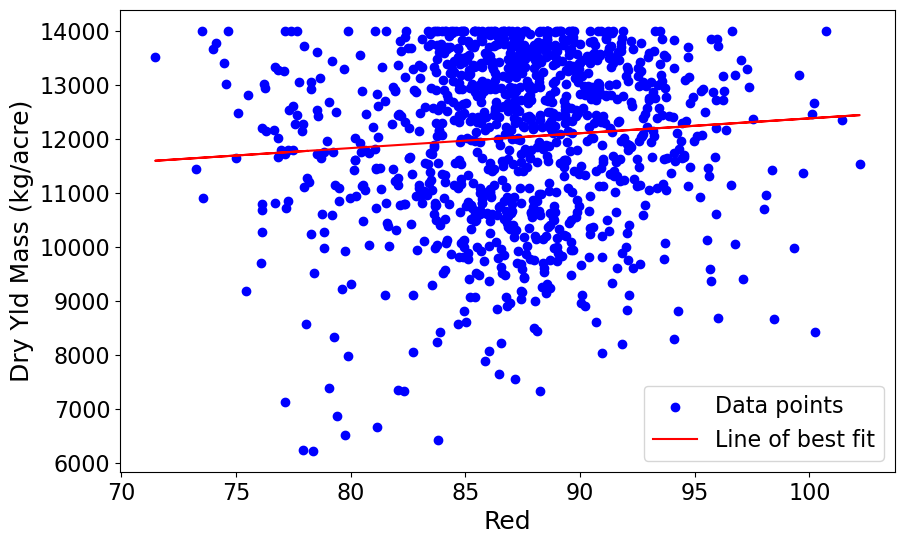

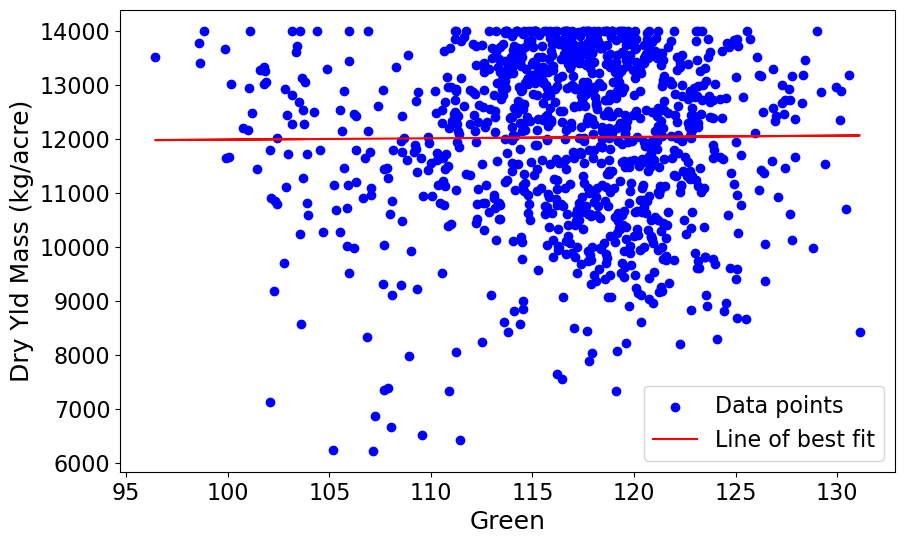

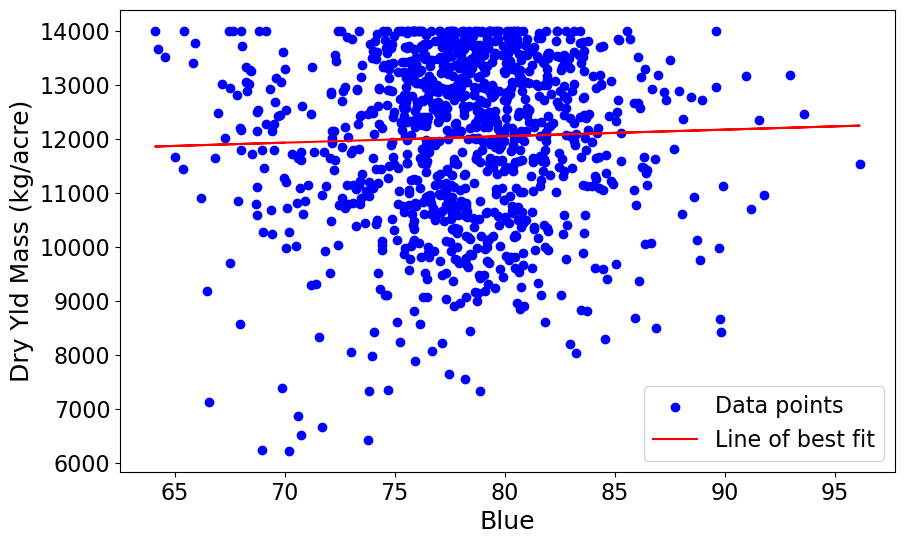

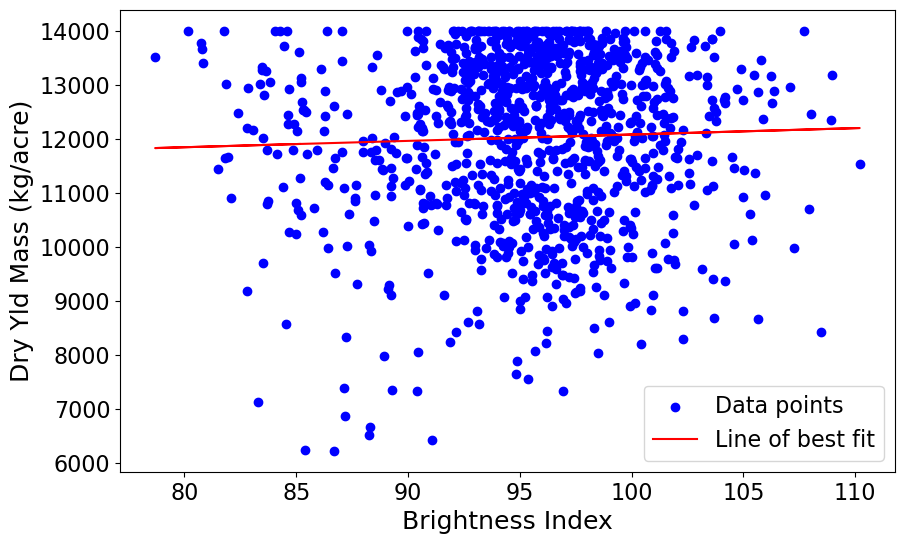

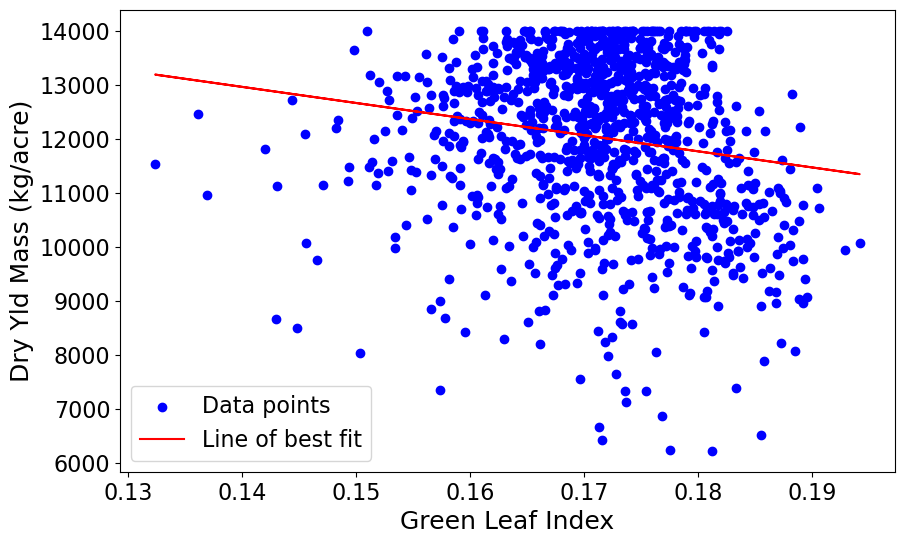

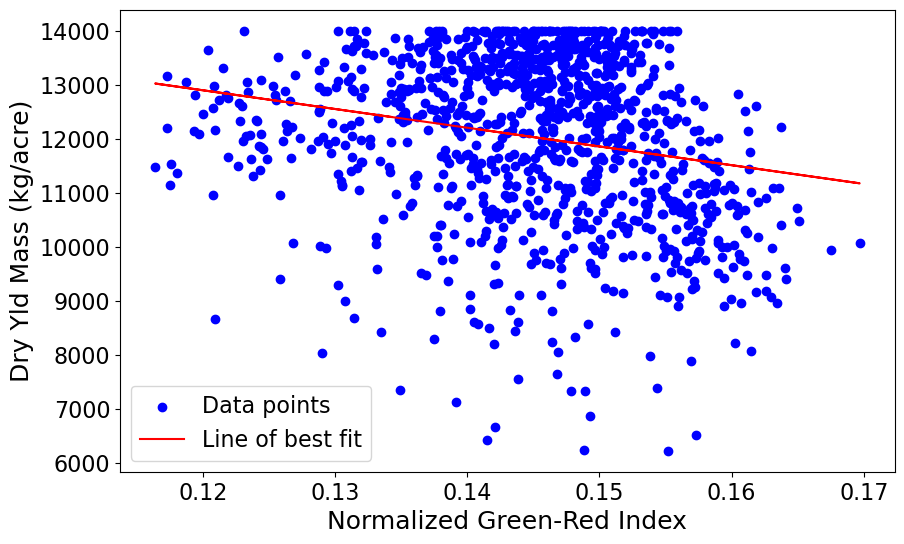

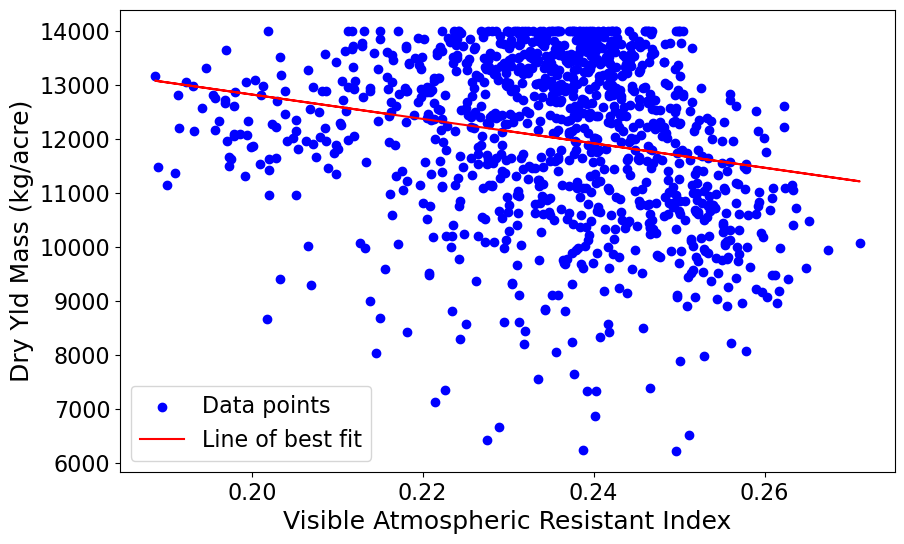

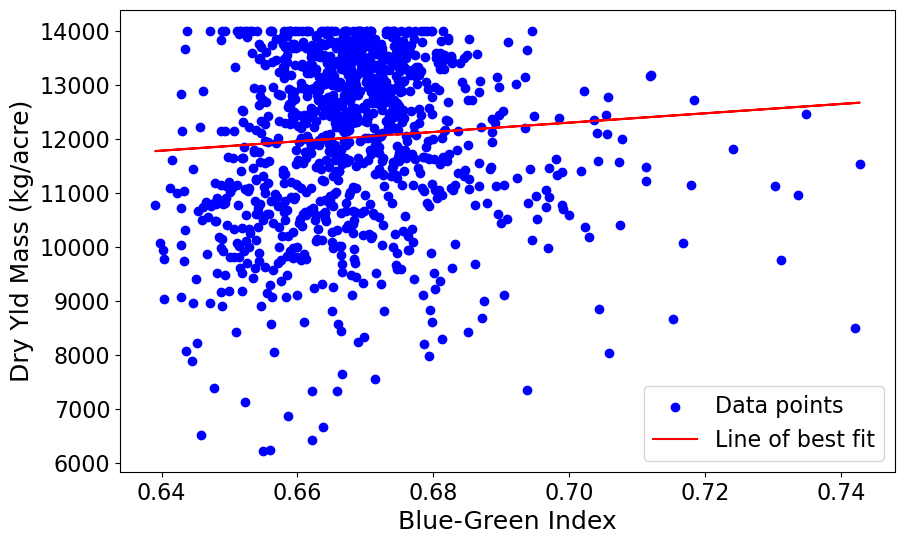

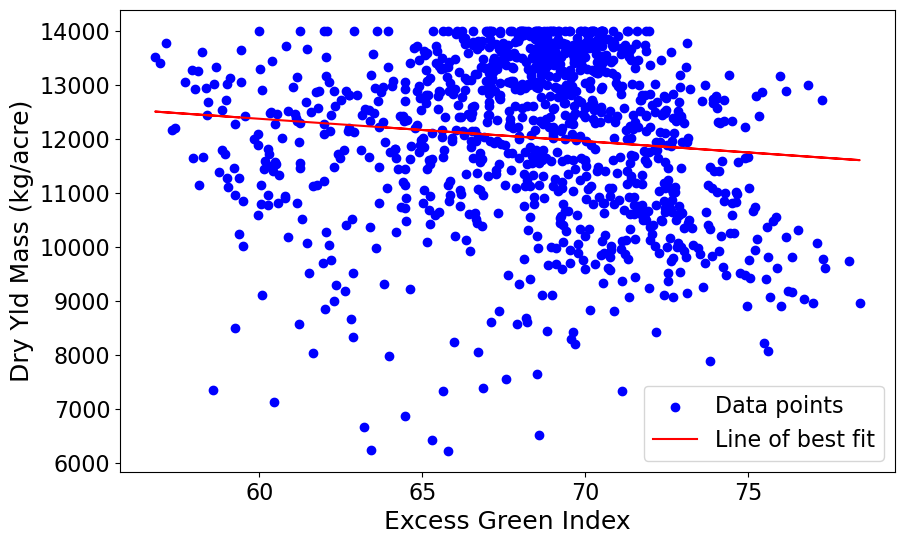

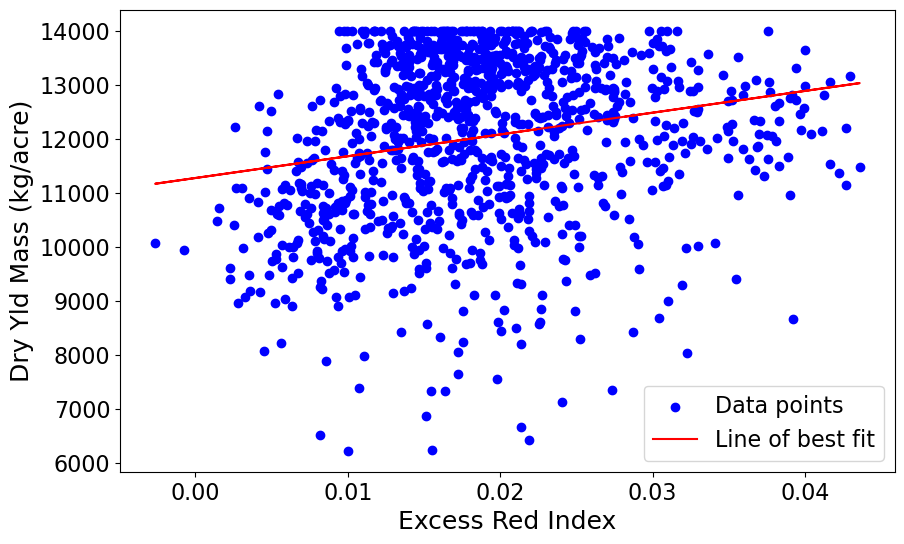

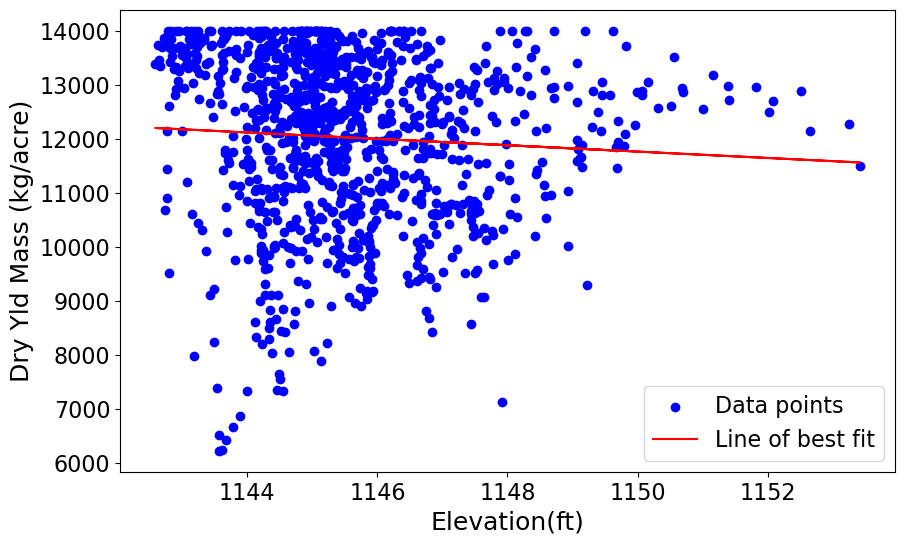

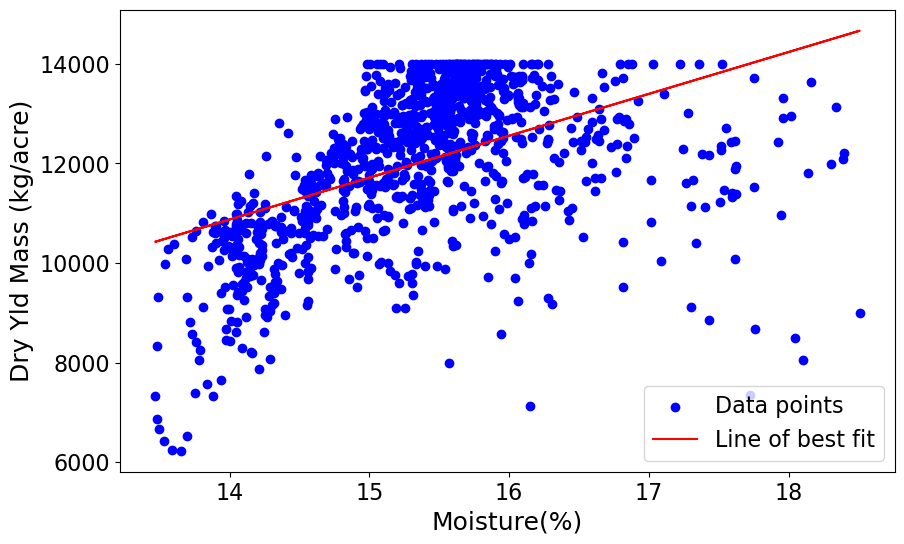

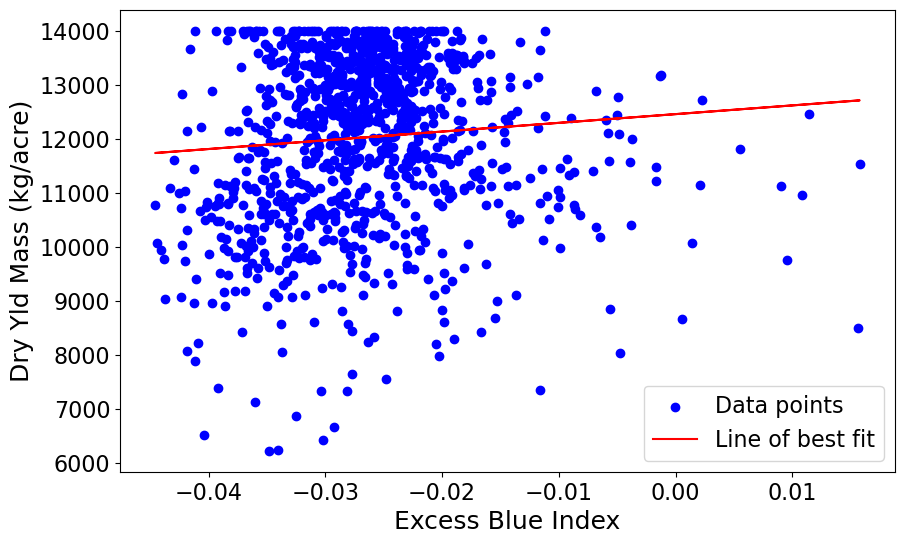

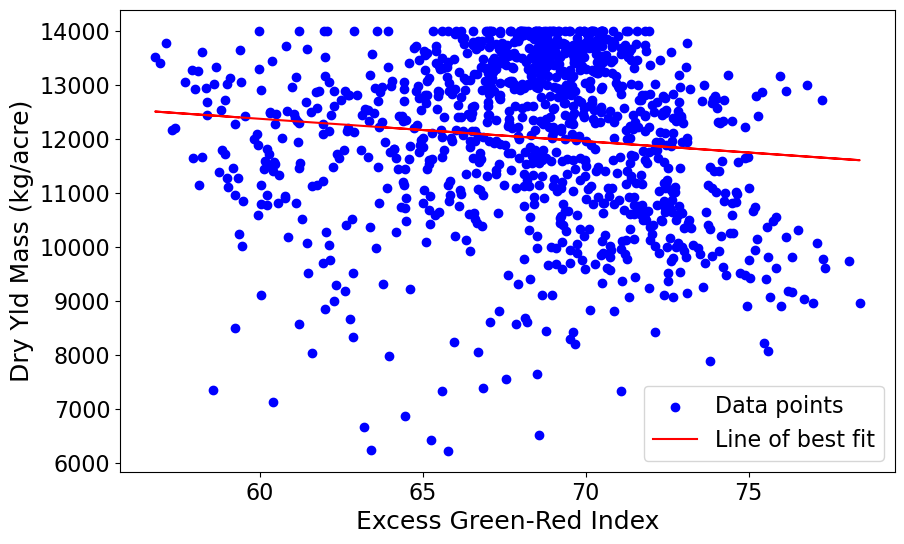

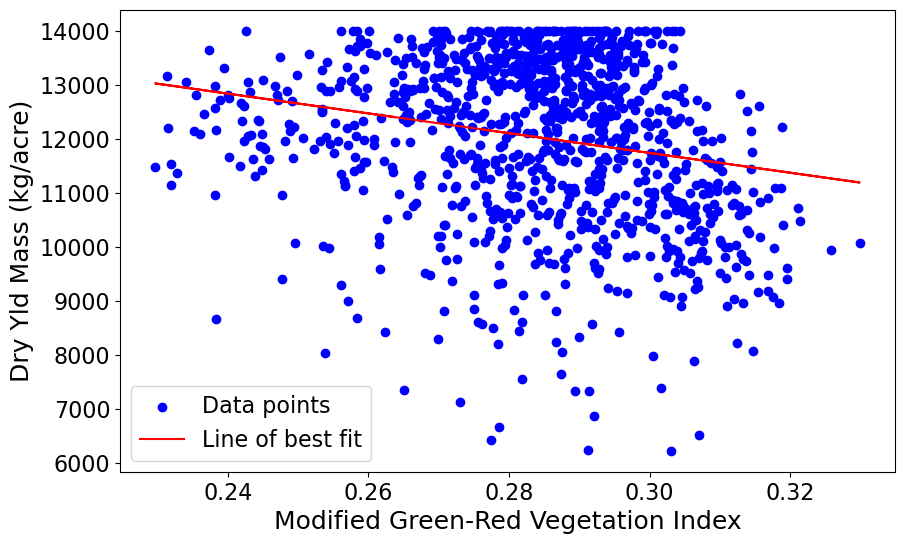

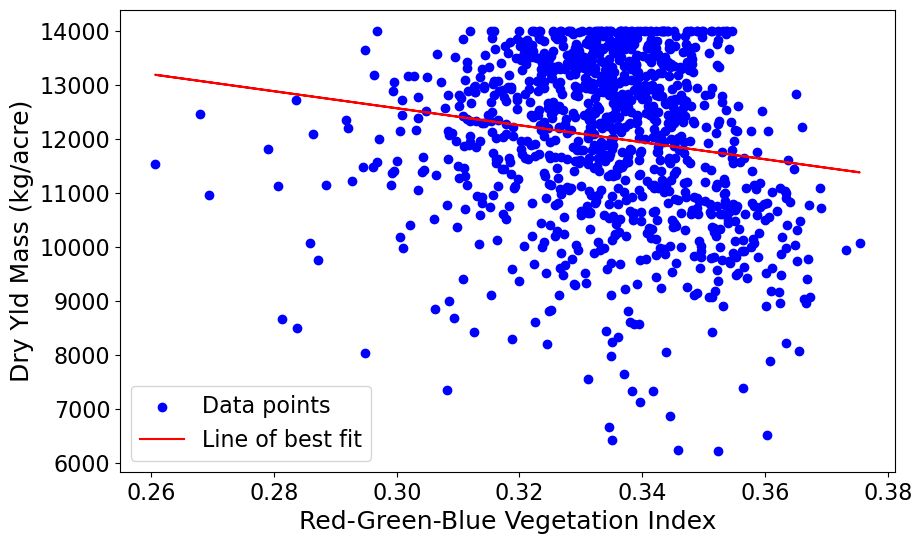

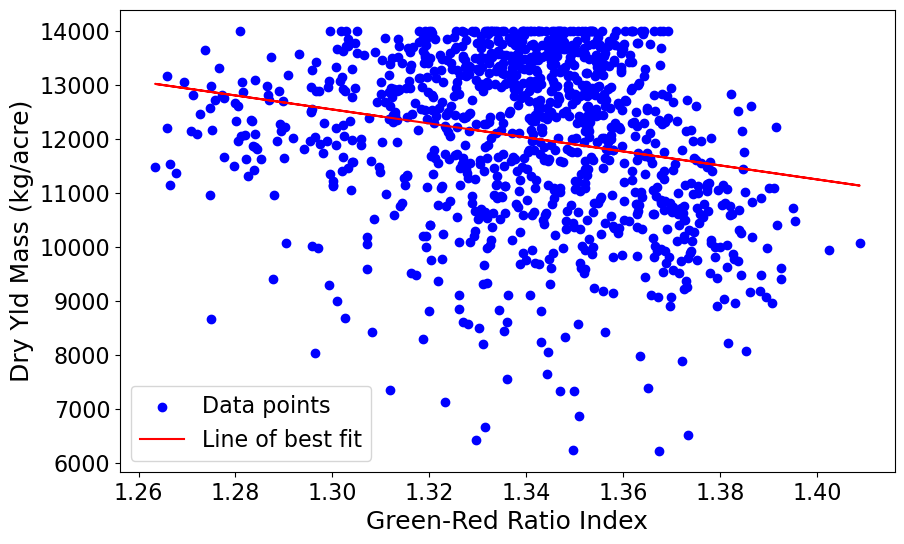

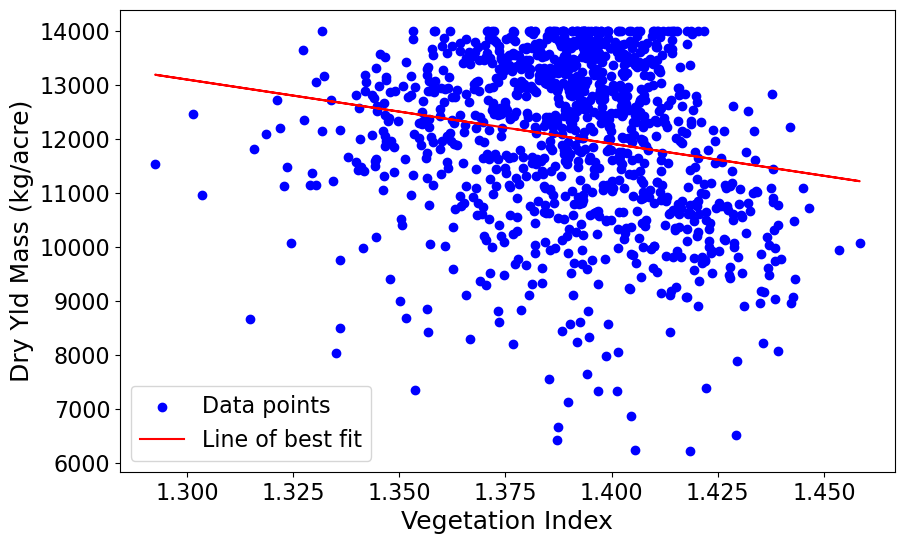

In [8]:
independent_vars = ['Red', 'Green', 'Blue', 'BI', 'GLI', 'NGRDI', 'VARI', 'BGI',
                    'ExG', 'ExR', 'Elevation(', 'Moisture(%', 'ExB', 'ExGR', 'MGRVI', 'RGBVI', 'GRRI', 'VEG']

dependent_var = 'Yld Mass(D'

intitle_vars = ['Red', 'Green', 'Blue', 'Brightness Index', 'Green Leaf Index', 'Normalized Green-Red Index', 'Visible Atmospheric Resistant Index', 'Blue-Green Index',
                'Excess Green Index', 'Excess Red Index', 'Elevation(ft)', 'Moisture(%)', 'Excess Blue Index', 'Excess Green-Red Index', 'Modified Green-Red Vegetation Index',
                'Red-Green-Blue Vegetation Index', 'Green-Red Ratio Index', 'Vegetation Index']

for var, title in zip(independent_vars, intitle_vars):
    plot_correlation_graphs_6_16_2021(pf, var, dependent_var, title)

In [9]:
#import data
pf = pd.read_csv('June_22_2021.csv') 
pf.head()

Plot  Year     Date     Red    Green    Blue          BI       GLI  \
0    10  2021  6222021  83.276  114.810  74.026   92.368965  0.186906   
1   100  2021  6222021  95.555  126.110  83.621  103.323056  0.169320   
2  1000  2021  6222021  69.260  100.340  62.231   79.031134  0.208293   
3  1001  2021  6222021  69.937  101.480  62.498   79.781732  0.210274   
4  1002  2021  6222021  67.815   99.029  60.808   77.681465  0.212547   

      NGRDI      VARI  ...      right     bottom  Crop Flw(M   Crop Flw(V  \
0  0.159193  0.254183  ... -93.531087  44.077643   22.856643  1469.352308   
1  0.137843  0.221342  ... -93.530970  44.077877   24.395856  1568.304403   
2  0.183255  0.289469  ... -93.529878  44.077721   17.781074  1143.067837   
3  0.184013  0.289601  ... -93.529878  44.077682   21.049884  1353.204549   
4  0.187085  0.294372  ... -93.529878  44.077643   18.681682  1200.964064   

    Elevation(  Moisture(%    Yld Mass(D  Yld Vol(Dr          X          Y  
0  1149.698459   14.982888  11941.481228  213.240485 -93.531098  44.077669  
1  1148.932088   15.534577  12985.621257  231.885824 -93.530981  44.077903  
2  1146.668877   15.872769  10789.630425  192.671722 -93.529889  44.077747  
3  1146.556017   15.901756  12275.215386  219.199995 -93.529889  44.077708  
4  1146.621894   15.948643  11643.570638  207.920634 -93.529889  44.077669  

[5 rows x 34 columns]

In [10]:
def plot_correlation_graphs_6_22_2021(df, independent_var, dependent_var, string_var):
    cols = df[[independent_var, dependent_var]]
    X = cols[independent_var].values.reshape(-1, 1)
    y = cols[dependent_var].values
    y = np.minimum(y, 14000)
    
    reg = LinearRegression()
    reg.fit(X, y)
    
    r2 = reg.score(X, y)
    
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color='blue', label='Data points')
    plt.plot(X, reg.predict(X), color='red', label='Line of best fit')
    
    plt.xlabel(string_var, fontsize=18)
    plt.ylabel("Dry Yld Mass (kg/acre)", fontsize=18)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    
    plt.legend(fontsize=16)

    plt.savefig(f'{independent_var}_vs_d_yld_mass_6_22_2021.png', bbox_inches='tight')
    plt.show()

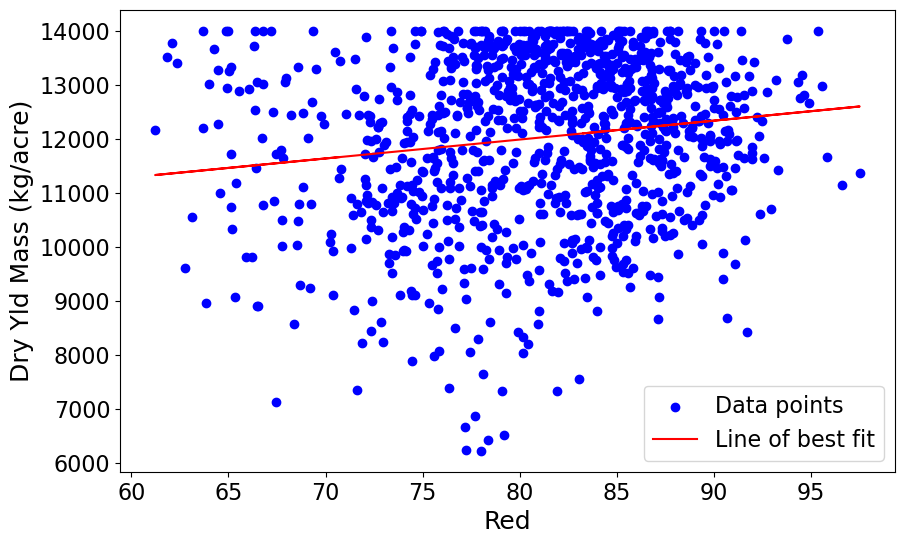

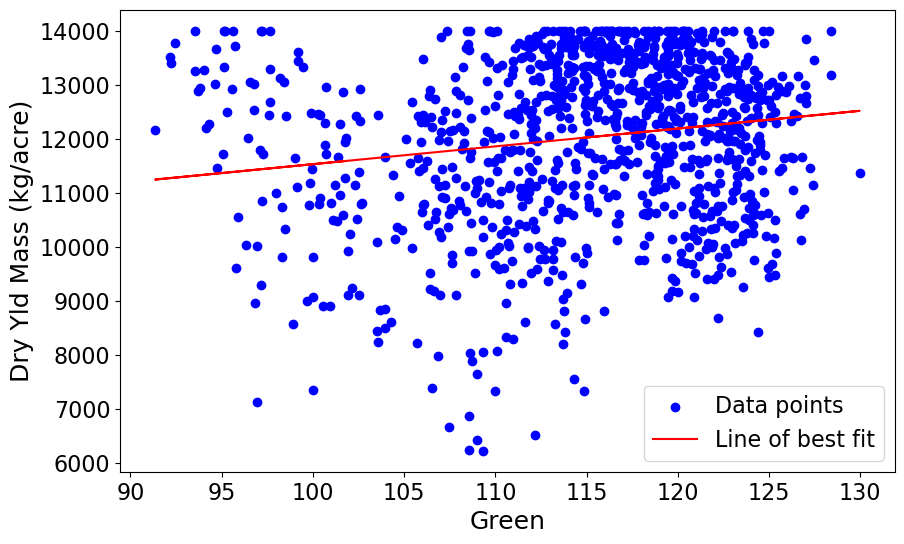

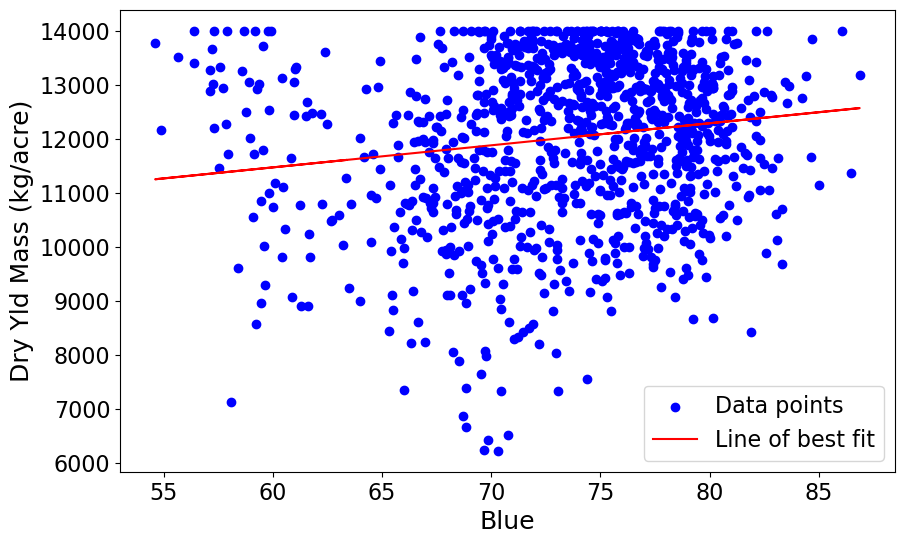

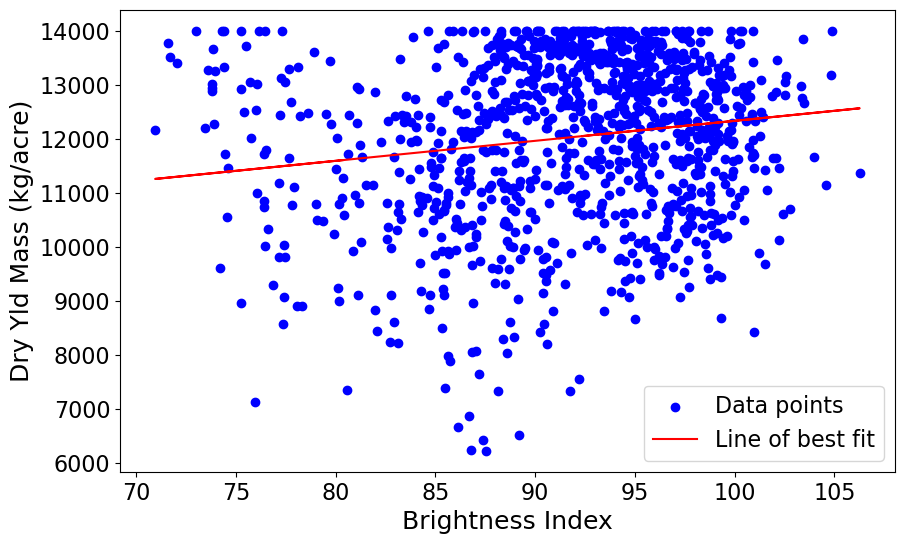

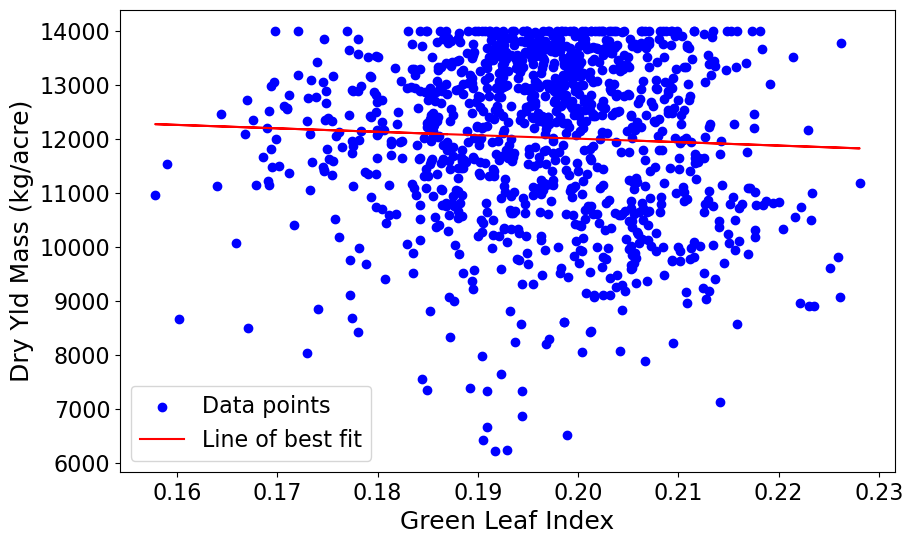

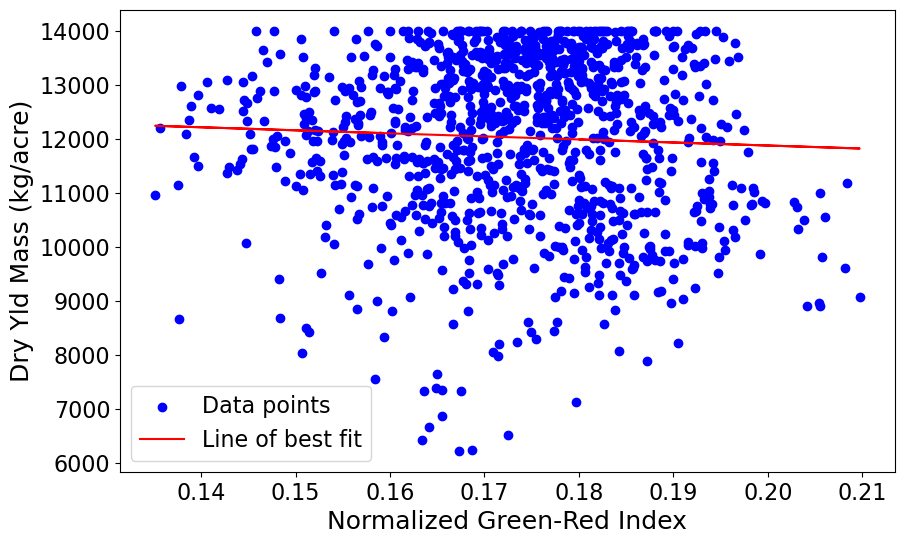

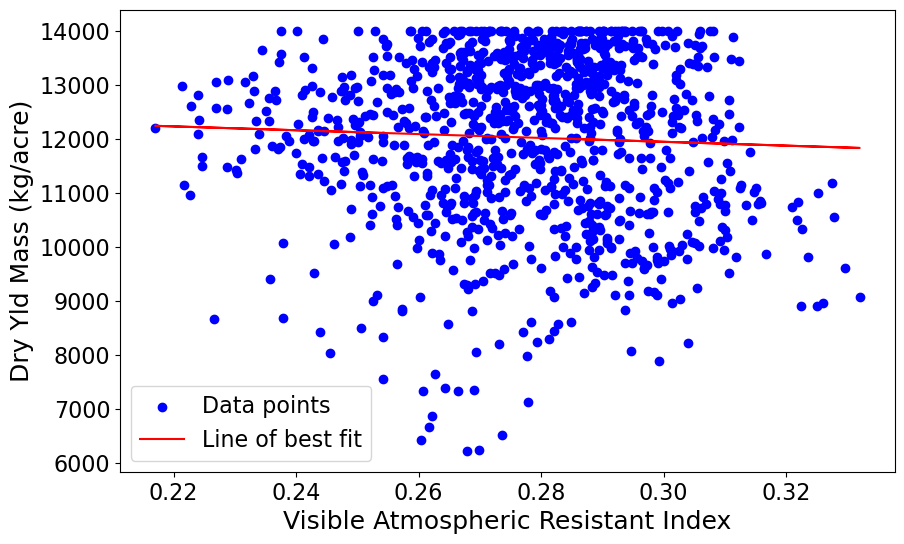

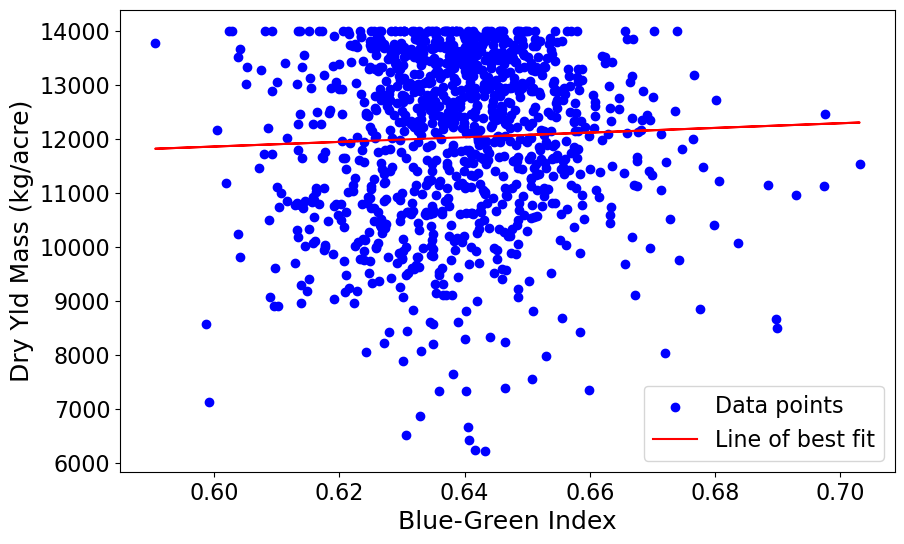

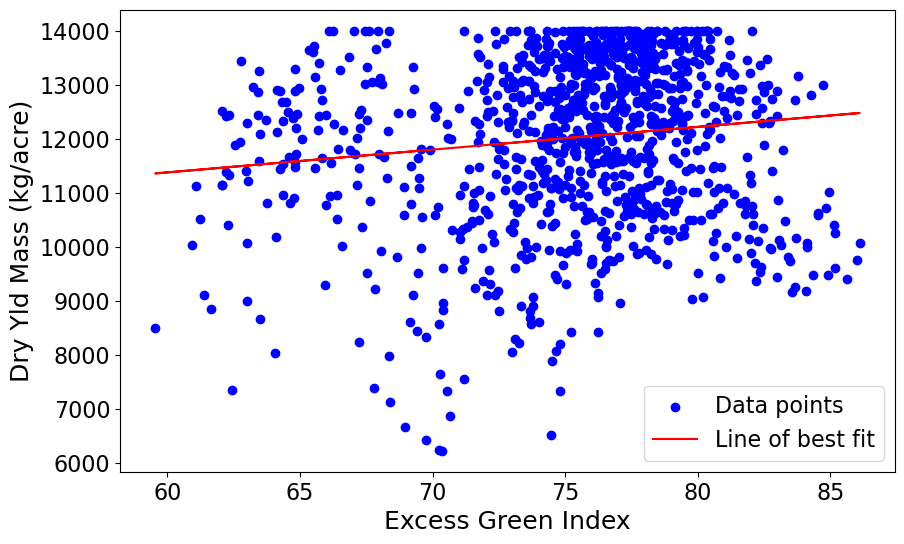

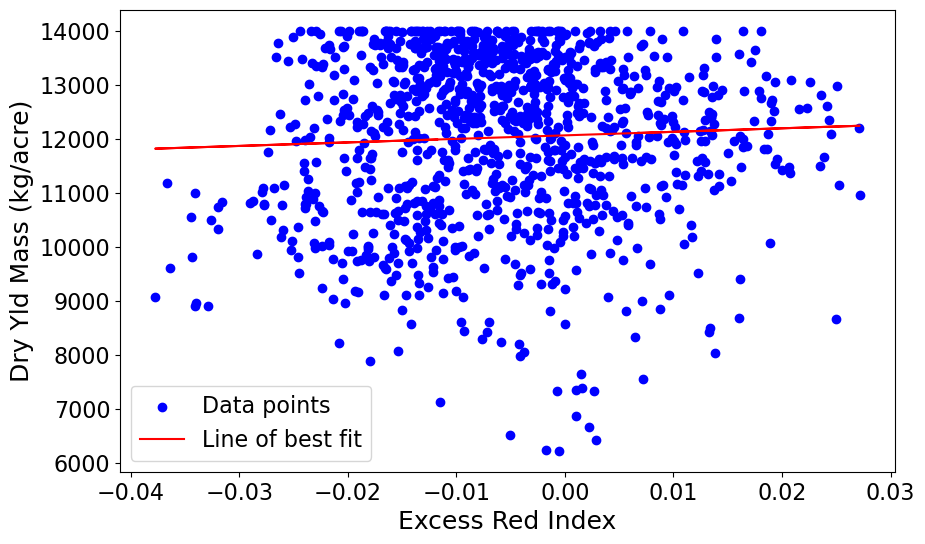

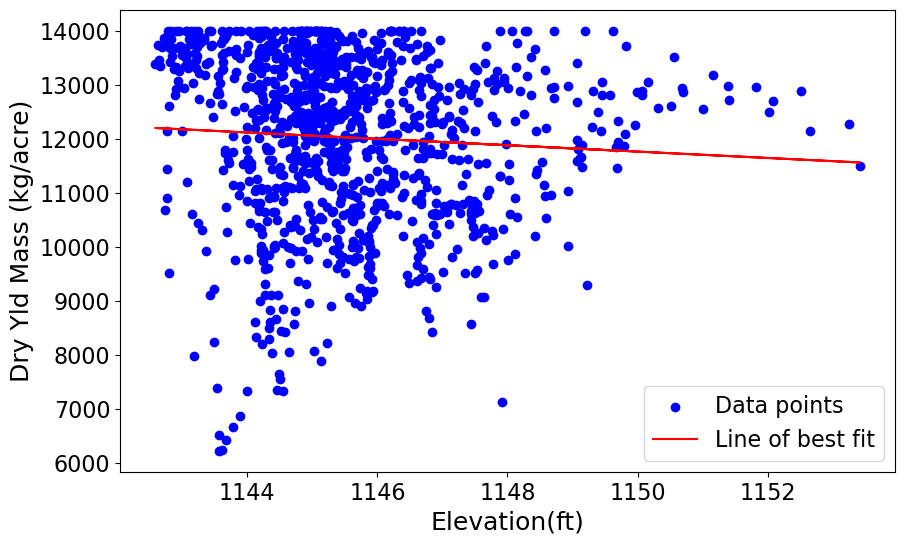

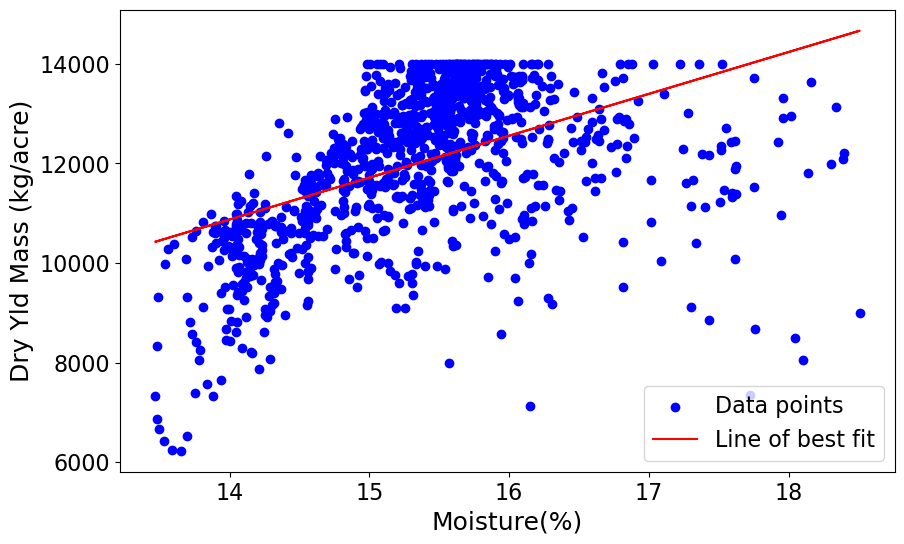

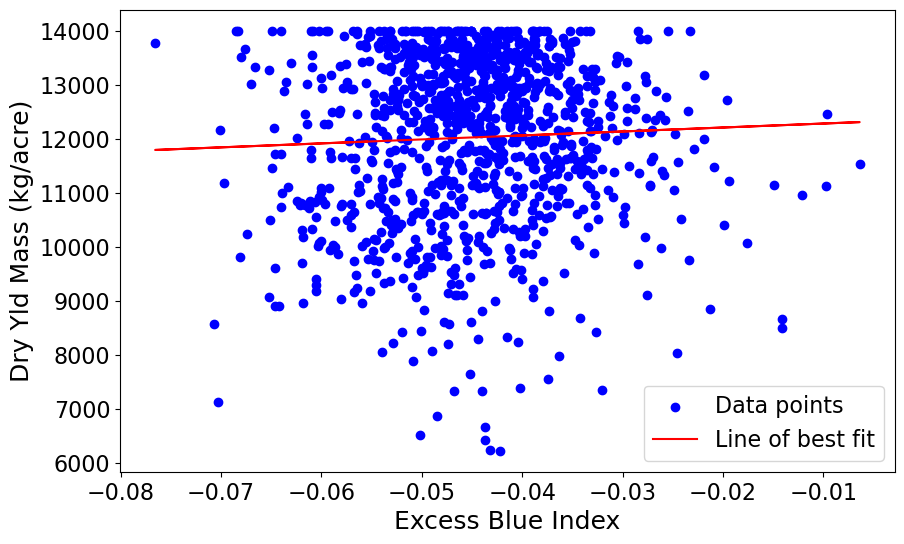

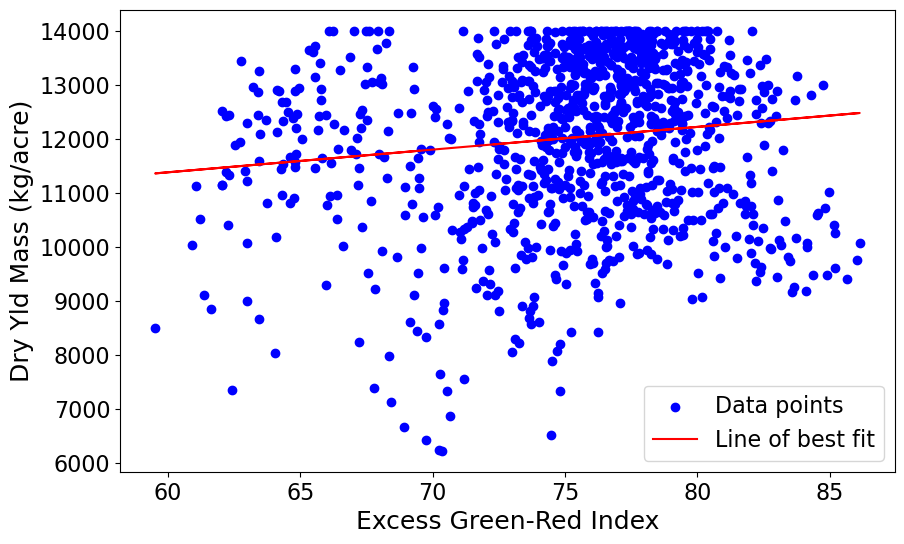

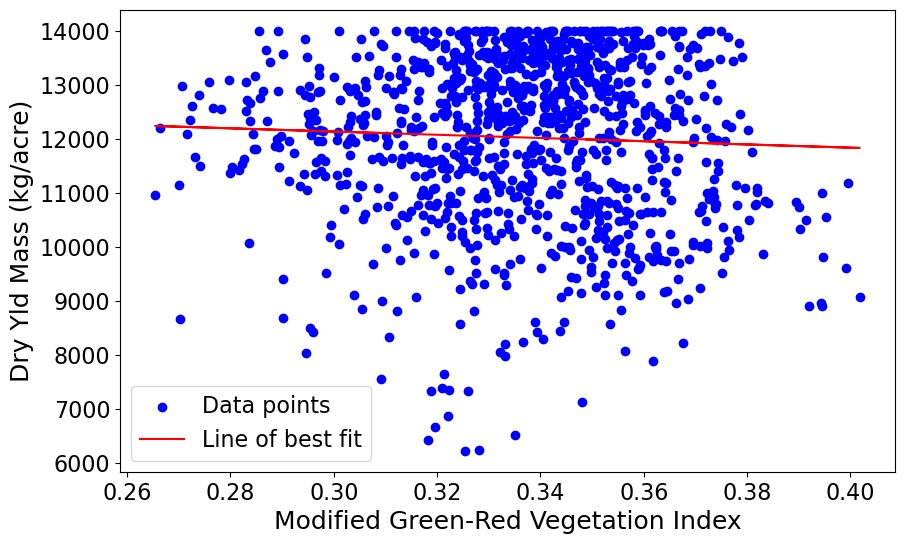

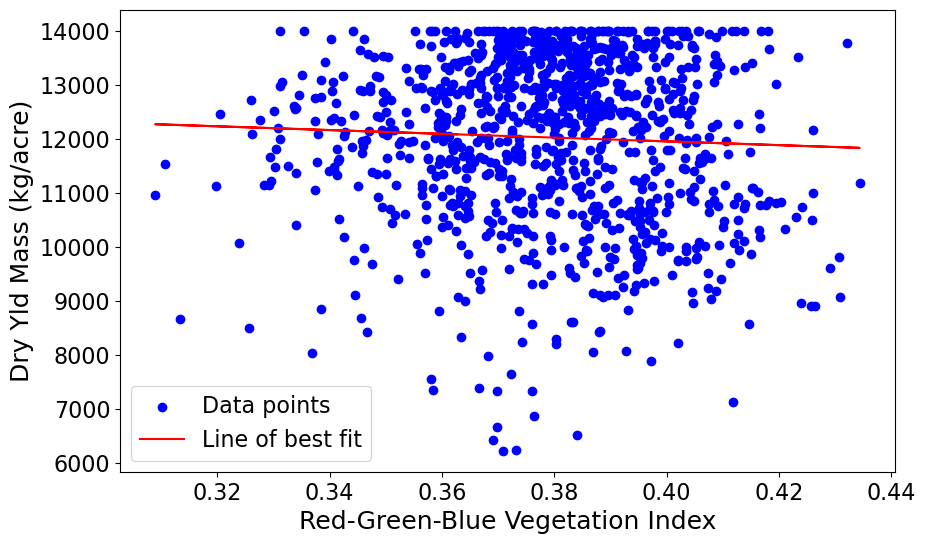

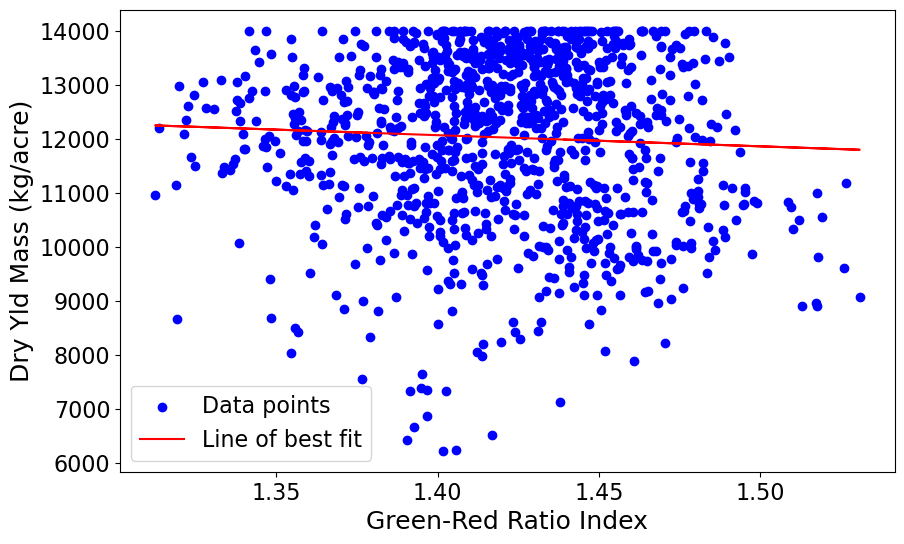

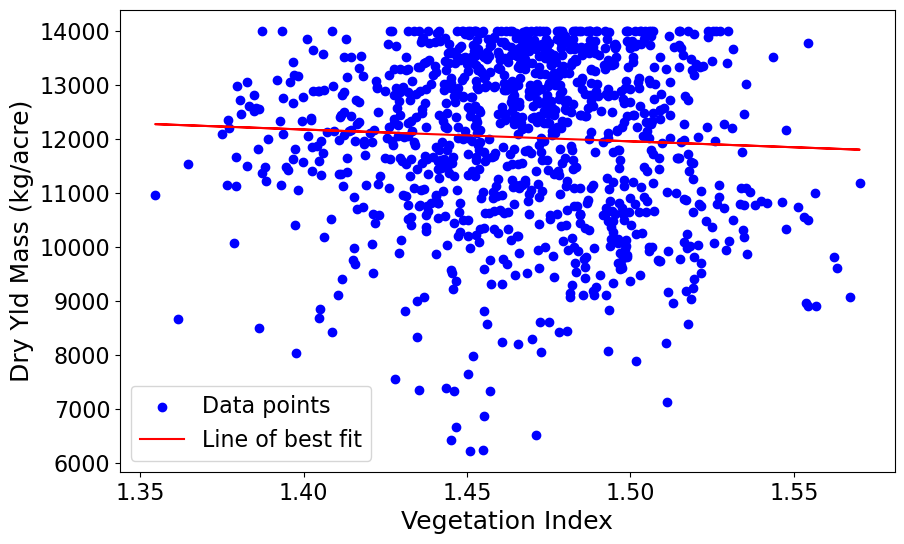

In [11]:
independent_vars = ['Red', 'Green', 'Blue', 'BI', 'GLI', 'NGRDI', 'VARI', 'BGI',
                    'ExG', 'ExR', 'Elevation(', 'Moisture(%', 'ExB', 'ExGR', 'MGRVI', 'RGBVI', 'GRRI', 'VEG']

dependent_var = 'Yld Mass(D'

intitle_vars = ['Red', 'Green', 'Blue', 'Brightness Index', 'Green Leaf Index', 'Normalized Green-Red Index', 'Visible Atmospheric Resistant Index', 'Blue-Green Index',
                'Excess Green Index', 'Excess Red Index', 'Elevation(ft)', 'Moisture(%)', 'Excess Blue Index', 'Excess Green-Red Index', 'Modified Green-Red Vegetation Index',
                'Red-Green-Blue Vegetation Index', 'Green-Red Ratio Index', 'Vegetation Index']

for var, title in zip(independent_vars, intitle_vars):
    plot_correlation_graphs_6_22_2021(pf, var, dependent_var, title)

In [12]:
#import data
pf = pd.read_csv('June_30_2021.csv') 
pf.head()

Plot  Year     Date     Red    Green    Blue         BI       GLI  \
0    10  2021  6302021  74.218  108.390  67.860  85.365261  0.208166   
1   100  2021  6302021  78.800  113.700  72.672  90.218900  0.200405   
2  1000  2021  6302021  52.207   79.147  45.413  60.696400  0.237087   
3  1001  2021  6302021  52.388   79.119  45.926  60.864648  0.233574   
4  1002  2021  6302021  52.336   78.947  45.684  60.714396  0.233961   

      NGRDI      VARI  ...      right     bottom  Crop Flw(M   Crop Flw(V  \
0  0.187133  0.297800  ... -93.531087  44.077643   22.856643  1469.352308   
1  0.181299  0.291251  ... -93.530970  44.077877   24.395856  1568.304403   
2  0.205095  0.313471  ... -93.529878  44.077721   17.781074  1143.067837   
3  0.203267  0.312347  ... -93.529878  44.077682   21.049884  1353.204549   
4  0.202700  0.310880  ... -93.529878  44.077643   18.681682  1200.964064   

    Elevation(  Moisture(%    Yld Mass(D  Yld Vol(Dr          X          Y  
0  1149.698459   14.982888  11941.481228  213.240485 -93.531098  44.077669  
1  1148.932088   15.534577  12985.621257  231.885824 -93.530981  44.077903  
2  1146.668877   15.872769  10789.630425  192.671722 -93.529889  44.077747  
3  1146.556017   15.901756  12275.215386  219.199995 -93.529889  44.077708  
4  1146.621894   15.948643  11643.570638  207.920634 -93.529889  44.077669  

[5 rows x 34 columns]

In [13]:
def plot_correlation_graphs_6_30_2021(df, independent_var, dependent_var, string_var):
    cols = df[[independent_var, dependent_var]]
    X = cols[independent_var].values.reshape(-1, 1)
    y = cols[dependent_var].values
    y = np.minimum(y, 14000)
    
    reg = LinearRegression()
    reg.fit(X, y)
    
    r2 = reg.score(X, y)
    
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color='blue', label='Data points')
    plt.plot(X, reg.predict(X), color='red', label='Line of best fit')
    
    plt.xlabel(string_var, fontsize=18)
    plt.ylabel("Dry Yld Mass (kg/acre)", fontsize=18)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    
    plt.legend(fontsize=16)

    plt.savefig(f'{independent_var}_vs_d_yld_mass_6_30_2021.png', bbox_inches='tight')
    plt.show()

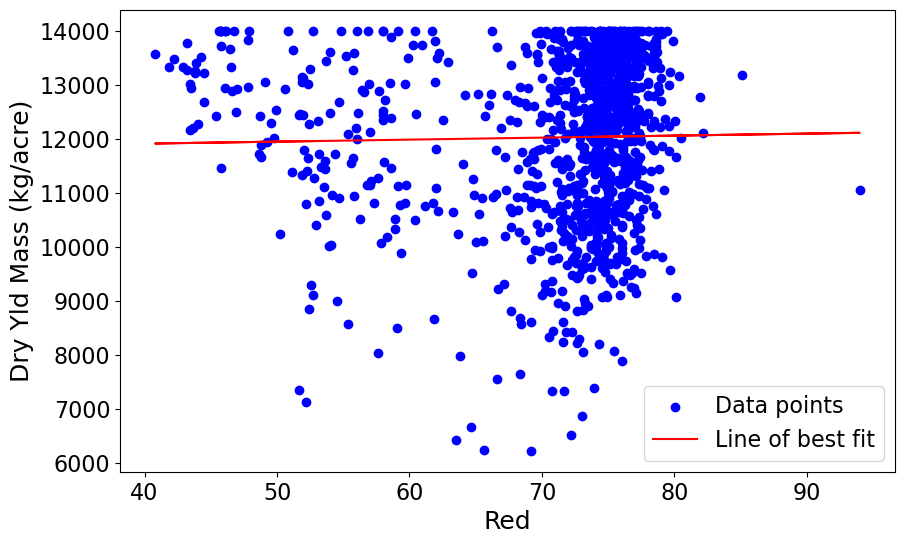

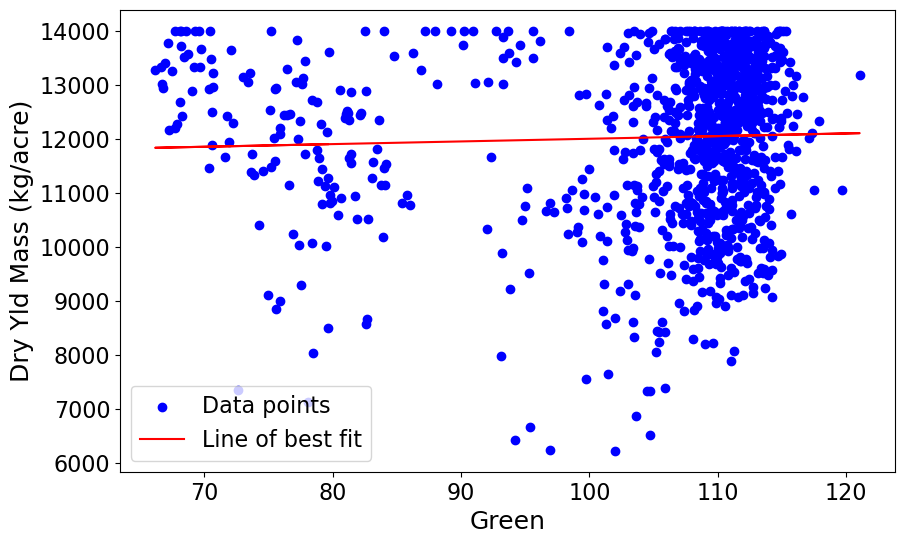

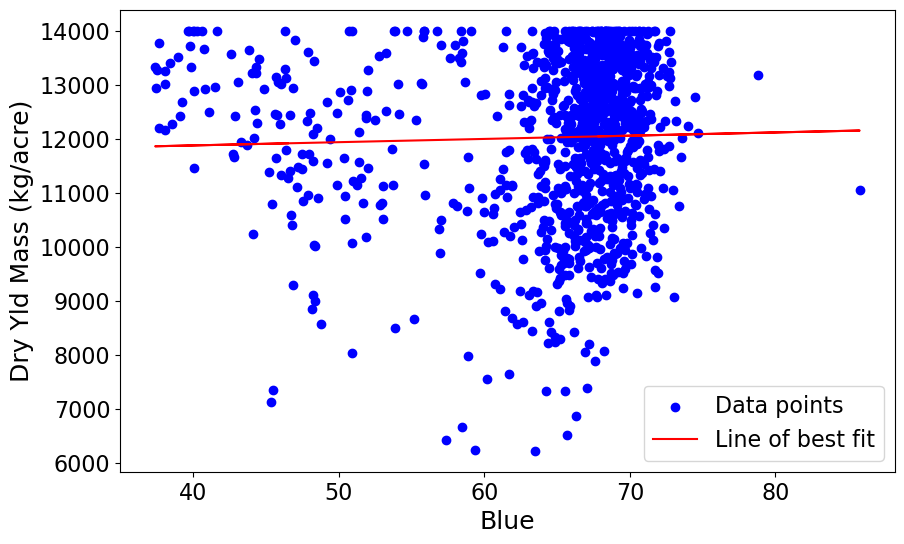

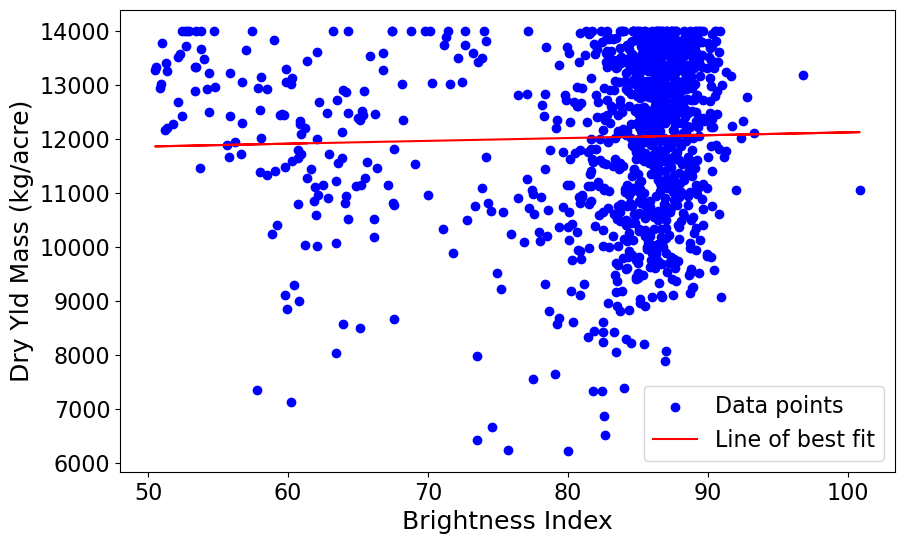

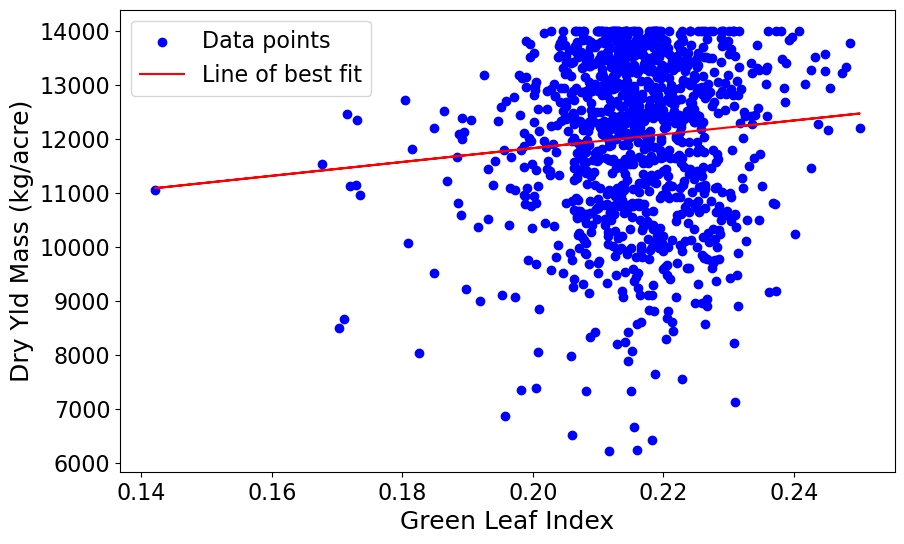

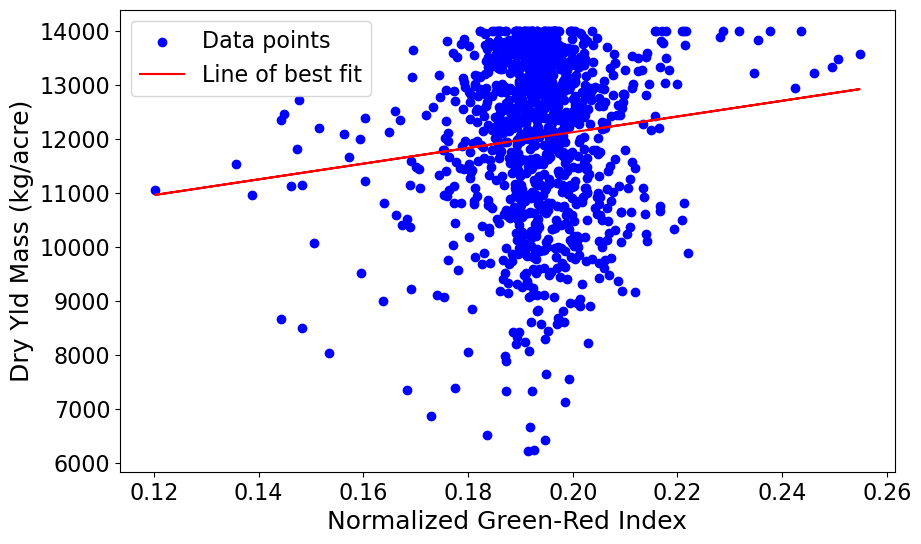

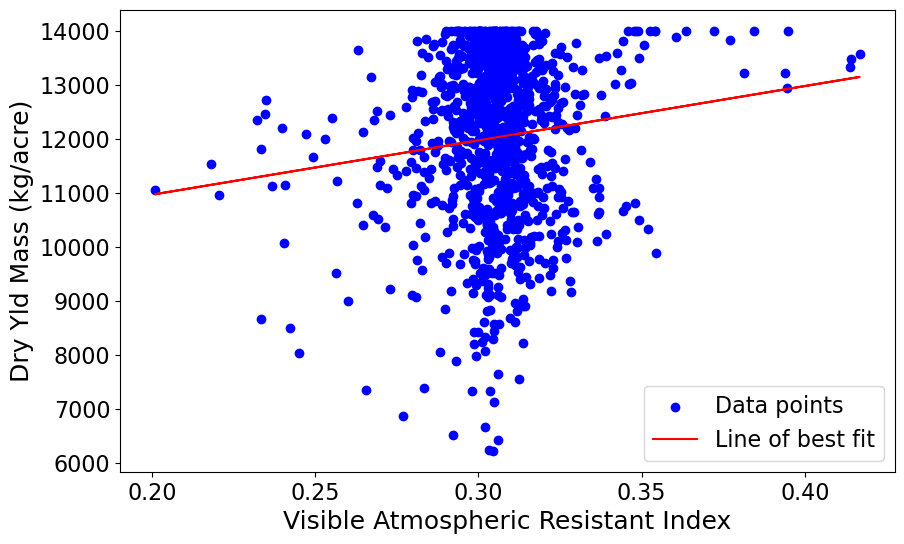

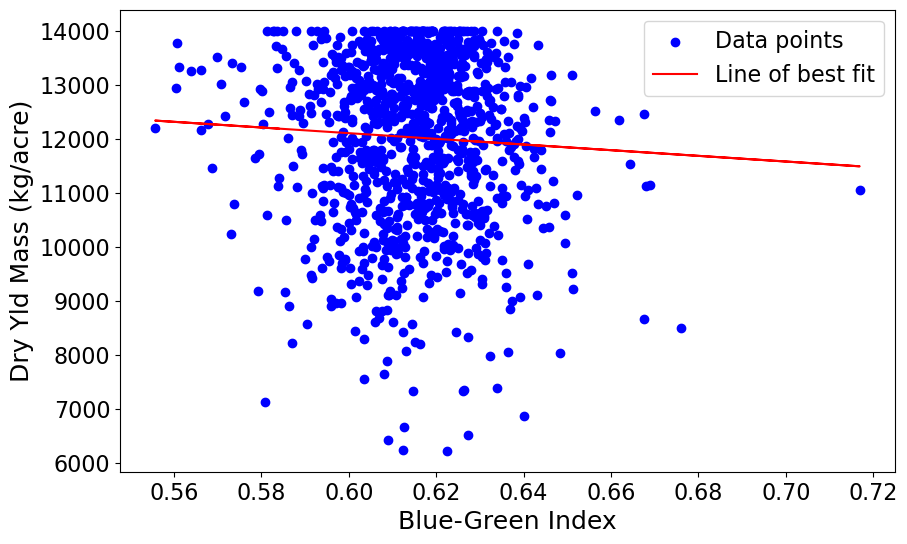

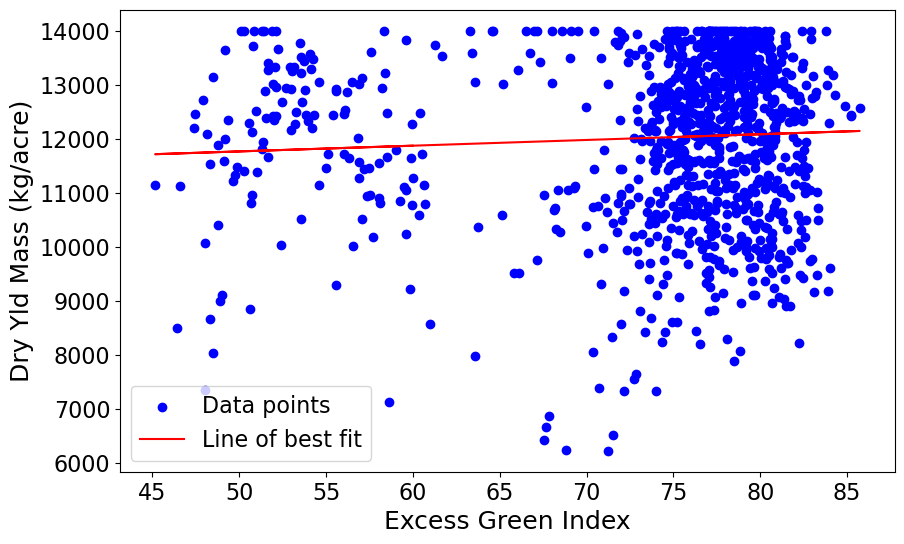

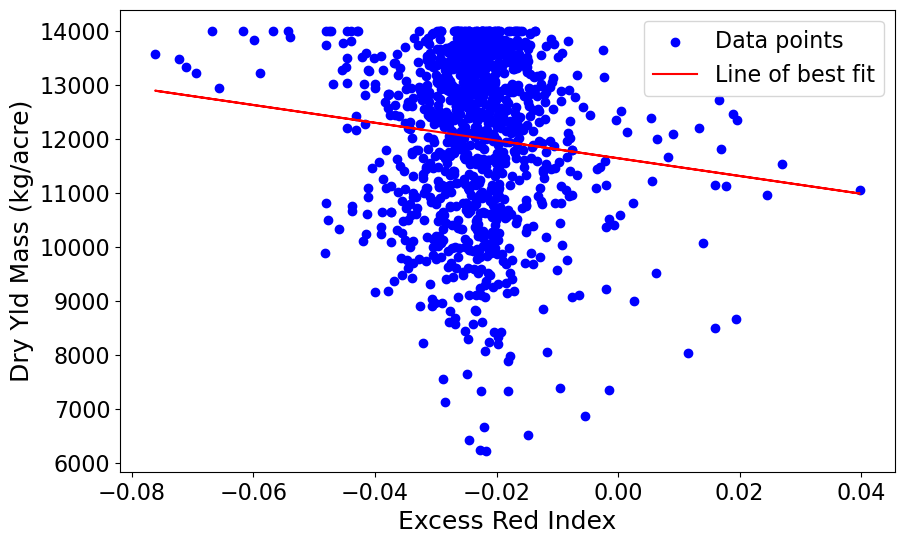

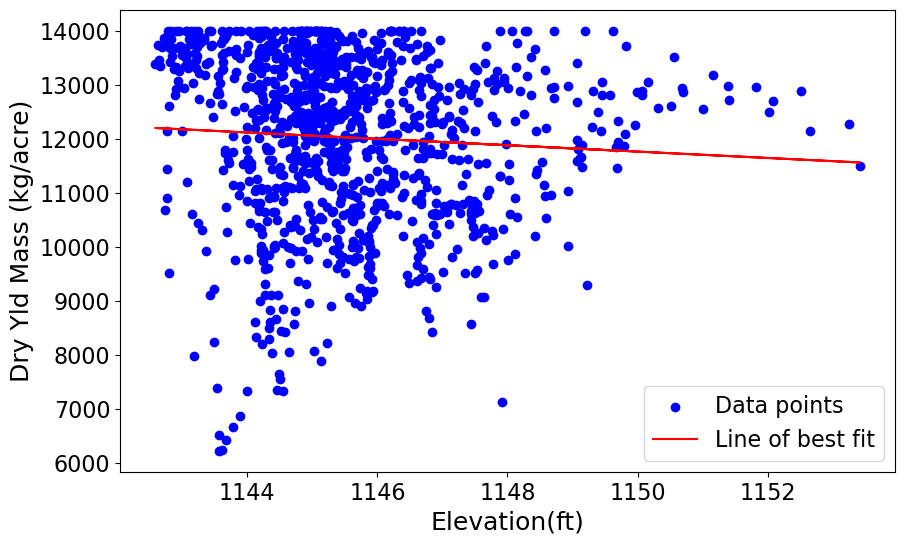

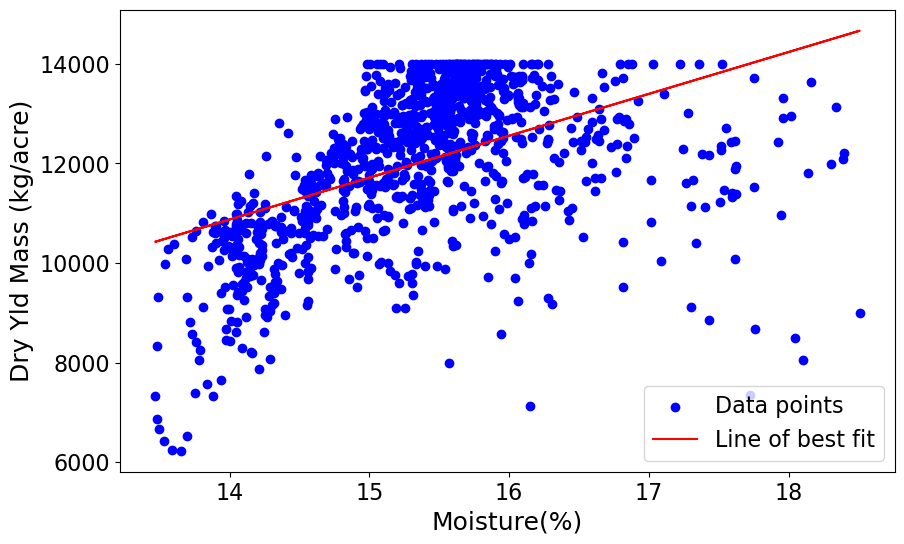

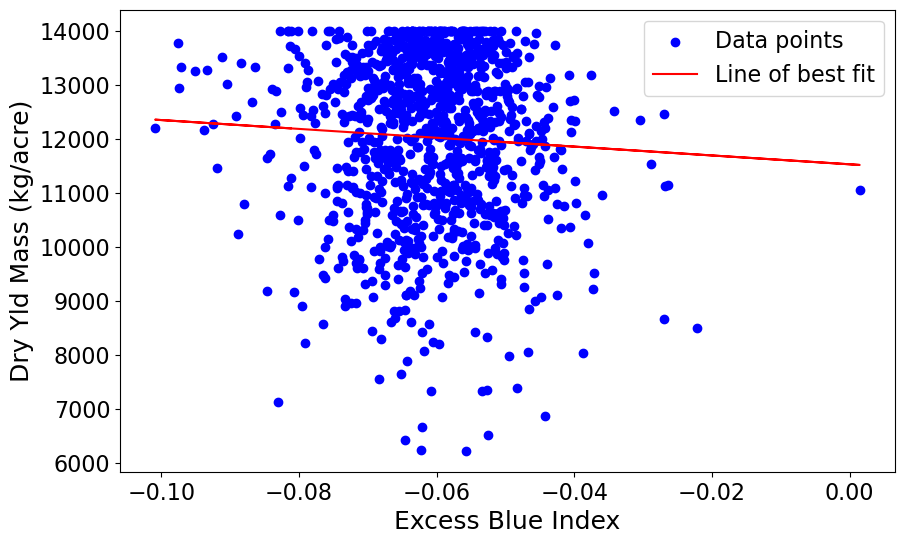

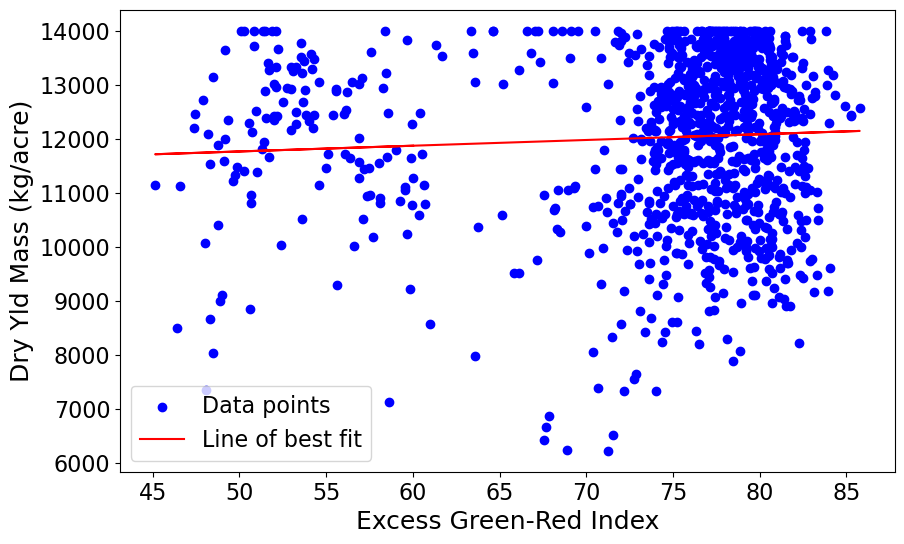

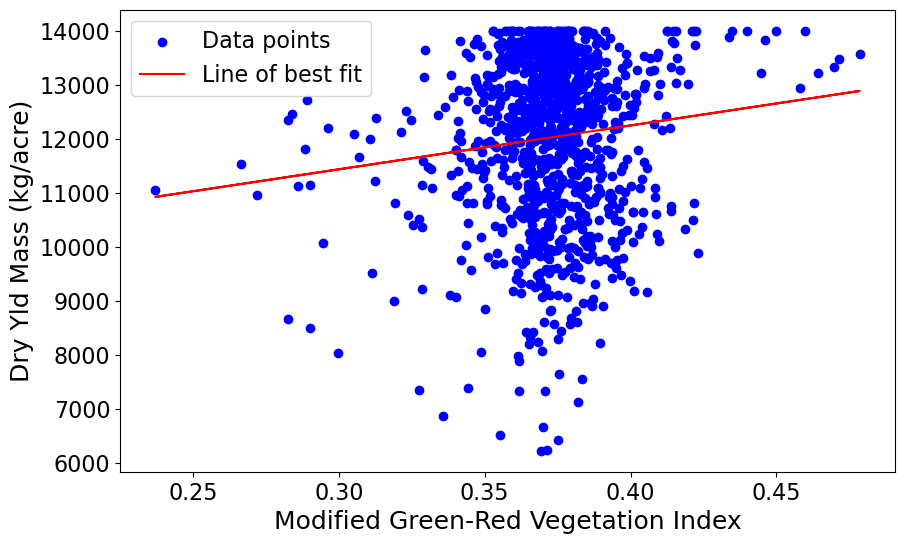

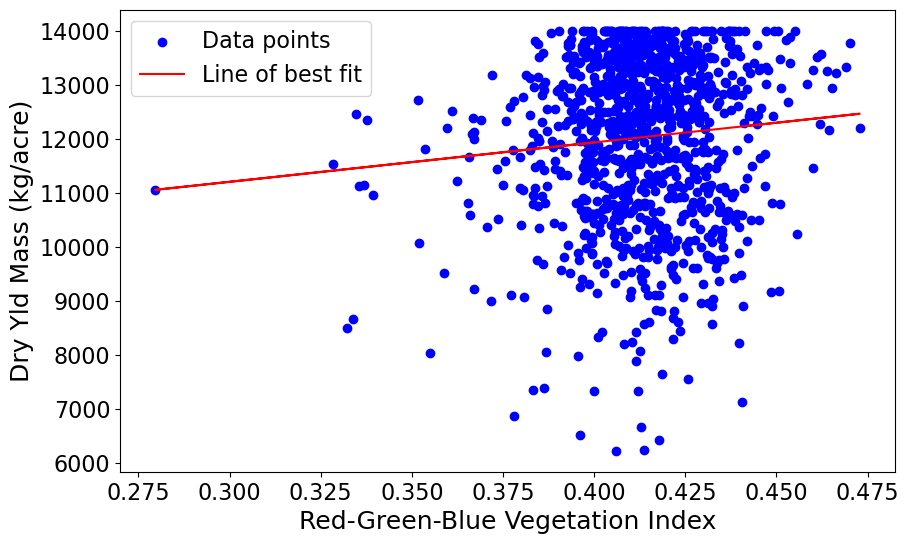

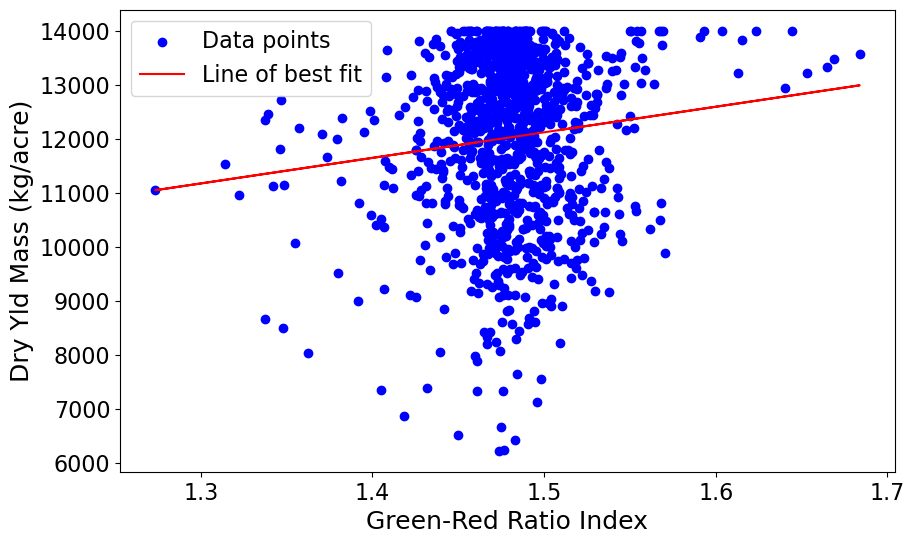

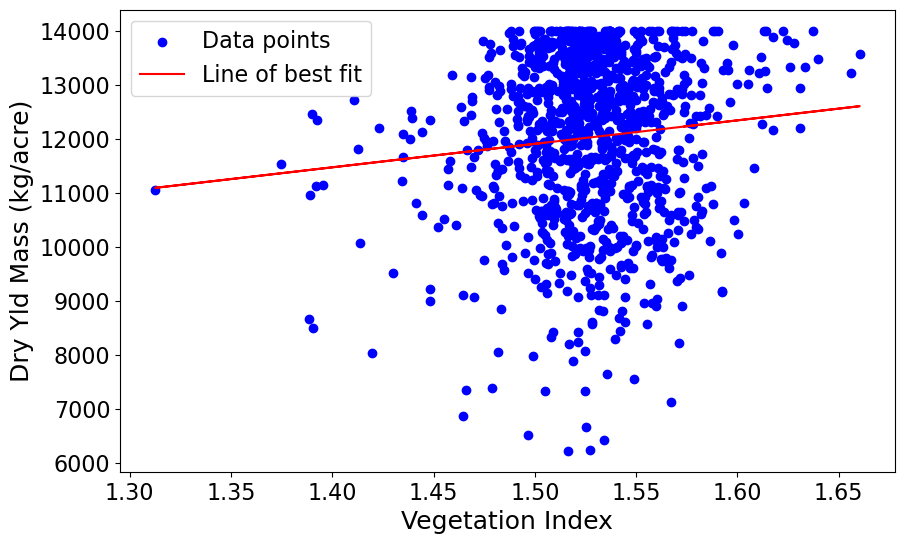

In [14]:
independent_vars = ['Red', 'Green', 'Blue', 'BI', 'GLI', 'NGRDI', 'VARI', 'BGI',
                    'ExG', 'ExR', 'Elevation(', 'Moisture(%', 'ExB', 'ExGR', 'MGRVI', 'RGBVI', 'GRRI', 'VEG']

dependent_var = 'Yld Mass(D'

intitle_vars = ['Red', 'Green', 'Blue', 'Brightness Index', 'Green Leaf Index', 'Normalized Green-Red Index', 'Visible Atmospheric Resistant Index', 'Blue-Green Index',
                'Excess Green Index', 'Excess Red Index', 'Elevation(ft)', 'Moisture(%)', 'Excess Blue Index', 'Excess Green-Red Index', 'Modified Green-Red Vegetation Index',
                'Red-Green-Blue Vegetation Index', 'Green-Red Ratio Index', 'Vegetation Index']

for var, title in zip(independent_vars, intitle_vars):
    plot_correlation_graphs_6_30_2021(pf, var, dependent_var, title)

In [21]:
#import data
pf = pd.read_csv('July_21_2021.csv') 
pf.head()

Plot  Year     Date     Red   Green    Blue         BI       GLI     NGRDI  \
0    10  2021  7122021  43.381  65.580  37.487  50.292222  0.237195  0.203733   
1   100  2021  7122021  47.079  68.731  40.102  53.380874  0.223826  0.186961   
2  1000  2021  7122021  44.014  64.905  37.321  50.142292  0.229582  0.191803   
3  1001  2021  7122021  43.385  63.678  36.391  49.198411  0.229709  0.189543   
4  1002  2021  7122021  43.522  64.188  36.985  49.605625  0.229167  0.191867   

       VARI  ...      right     bottom  Crop Flw(M   Crop Flw(V   Elevation(  \
0  0.310588  ... -93.531087  44.077643   22.856643  1469.352308  1149.698459   
1  0.285994  ... -93.530970  44.077877   24.395856  1568.304403  1148.932088   
2  0.291782  ... -93.529878  44.077721   17.781074  1143.067837  1146.668877   
3  0.287143  ... -93.529878  44.077682   21.049884  1353.204549  1146.556017   
4  0.292202  ... -93.529878  44.077643   18.681682  1200.964064  1146.621894   

   Moisture(%    Yld Mass(D  Yld Vol(Dr          X          Y  
0   14.982888  11941.481228  213.240485 -93.531098  44.077669  
1   15.534577  12985.621257  231.885824 -93.530981  44.077903  
2   15.872769  10789.630425  192.671722 -93.529889  44.077747  
3   15.901756  12275.215386  219.199995 -93.529889  44.077708  
4   15.948643  11643.570638  207.920634 -93.529889  44.077669  

[5 rows x 34 columns]

In [22]:
def plot_correlation_graphs_7_21_2021(df, independent_var, dependent_var, string_var):
    cols = df[[independent_var, dependent_var]]
    X = cols[independent_var].values.reshape(-1, 1)
    y = cols[dependent_var].values
    y = np.minimum(y, 14000)
    
    reg = LinearRegression()
    reg.fit(X, y)
    
    r2 = reg.score(X, y)
    
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color='blue', label='Data points')
    plt.plot(X, reg.predict(X), color='red', label='Line of best fit')
    
    plt.xlabel(string_var, fontsize=18)
    plt.ylabel("Dry Yld Mass (kg/acre)", fontsize=18)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    
    plt.legend(fontsize=16)

    plt.savefig(f'{independent_var}_vs_d_yld_mass_7_21_2021.png', bbox_inches='tight')
    plt.show()

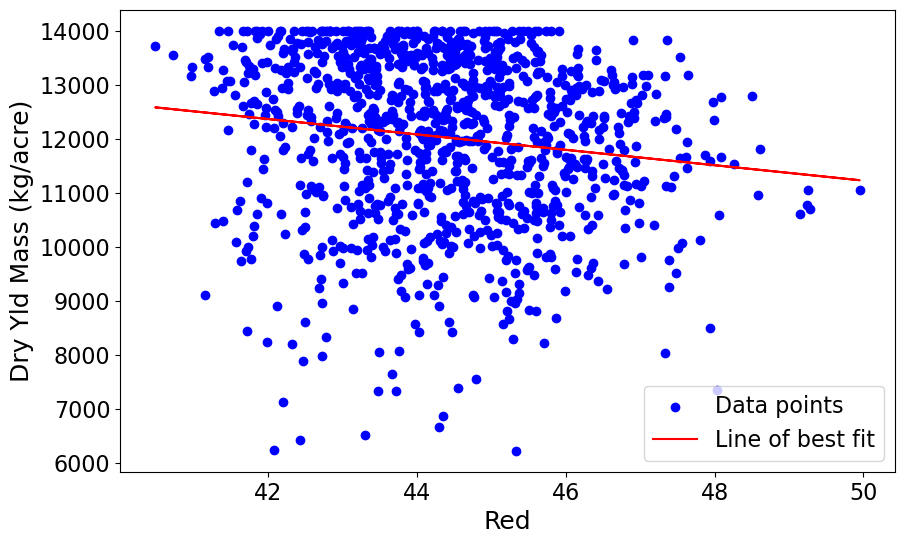

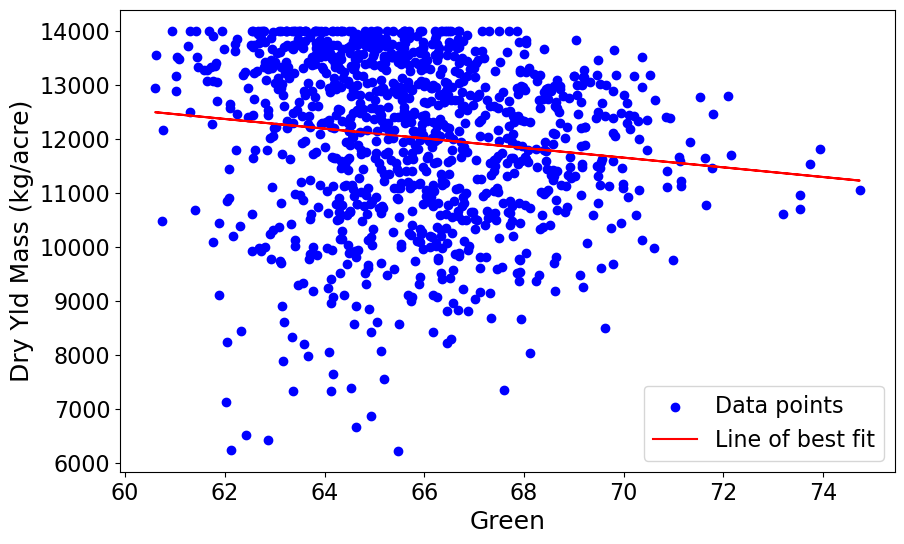

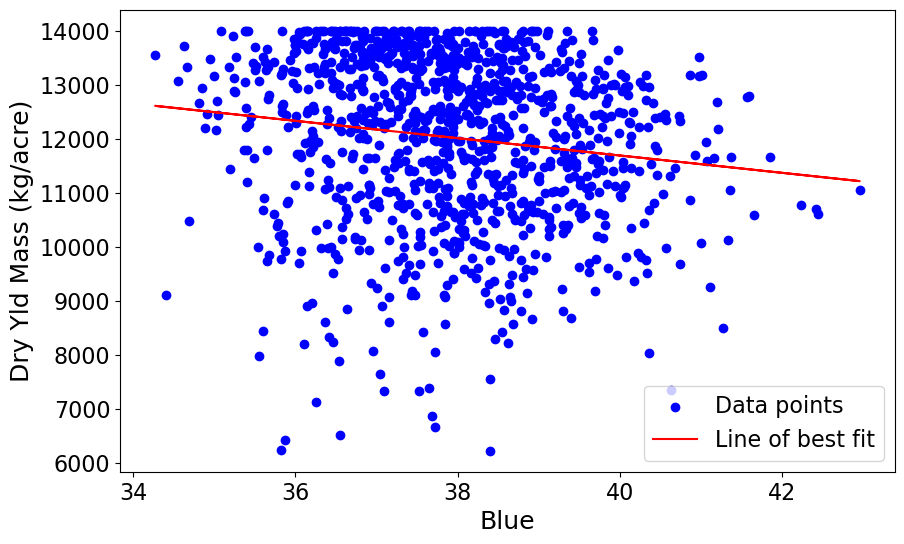

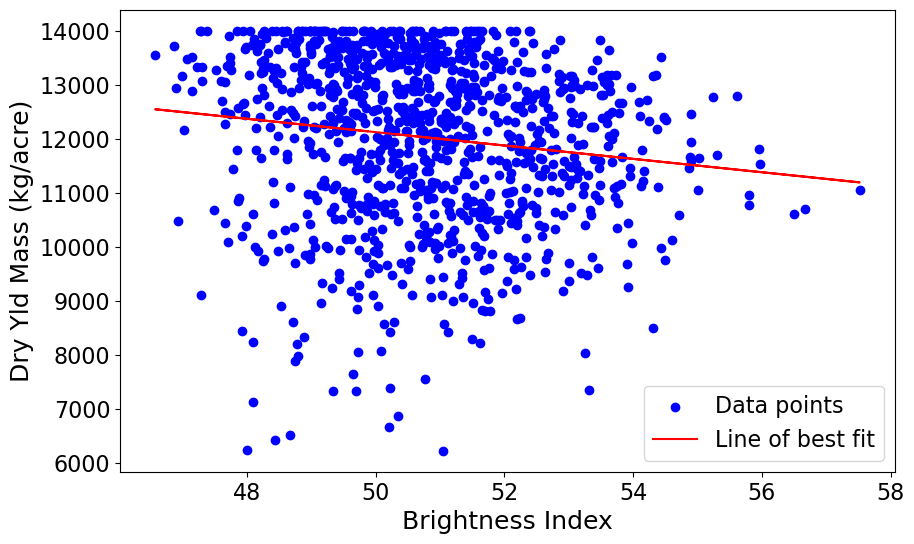

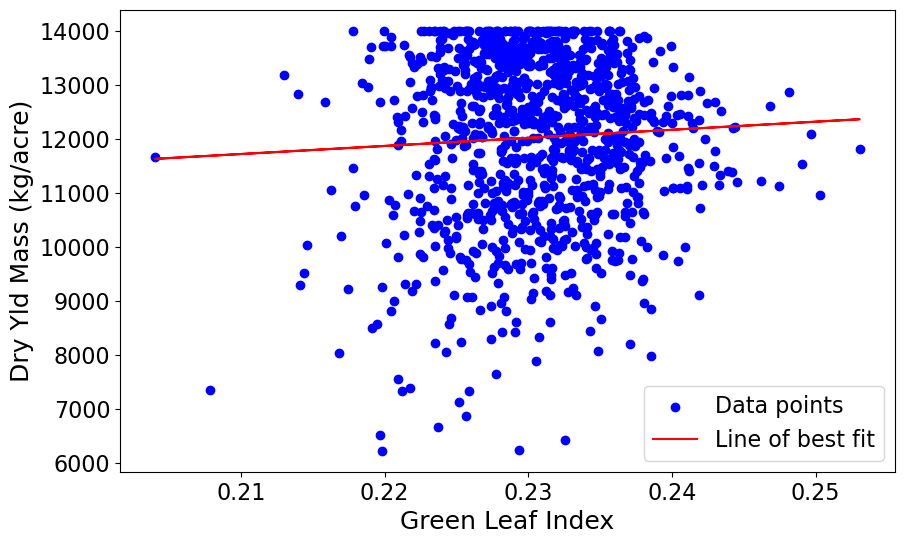

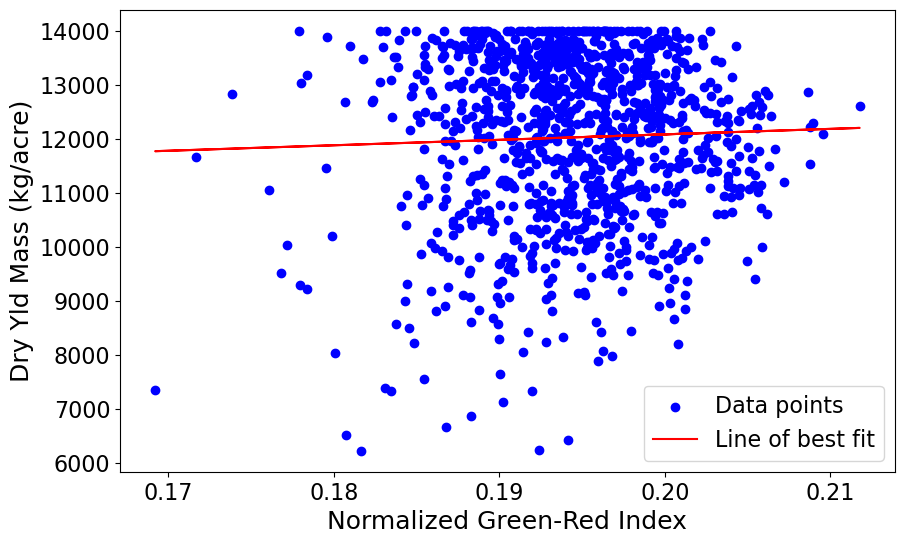

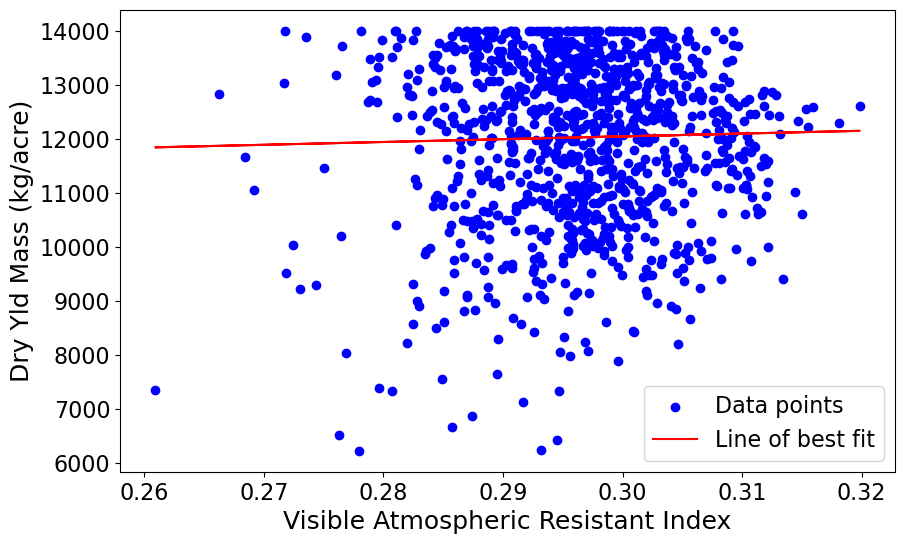

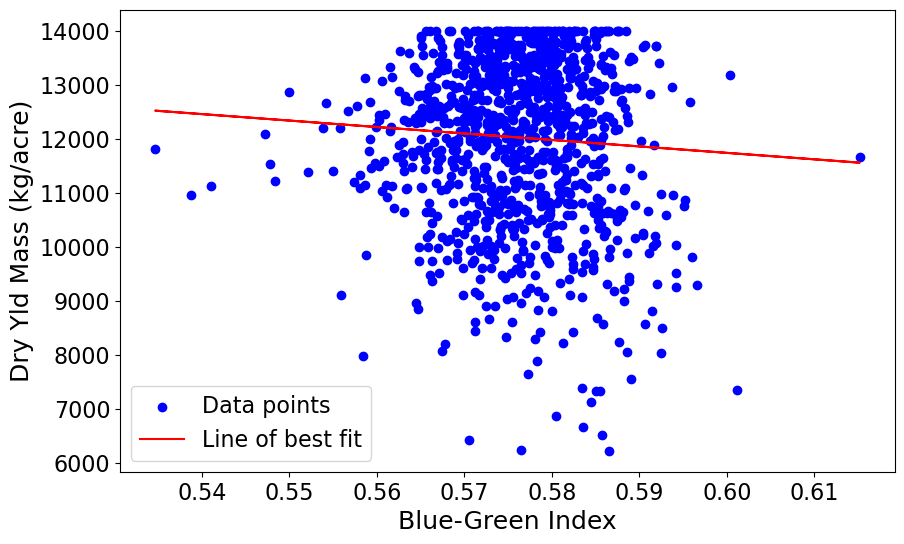

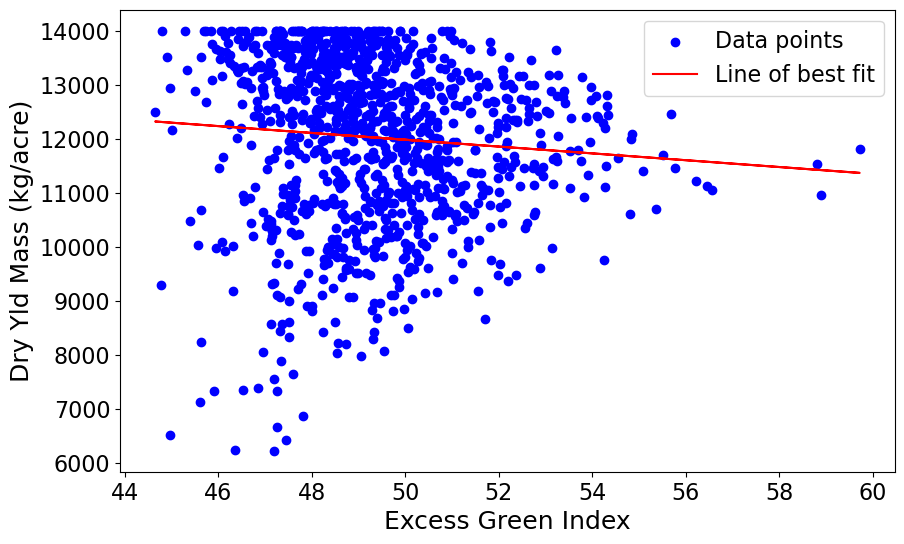

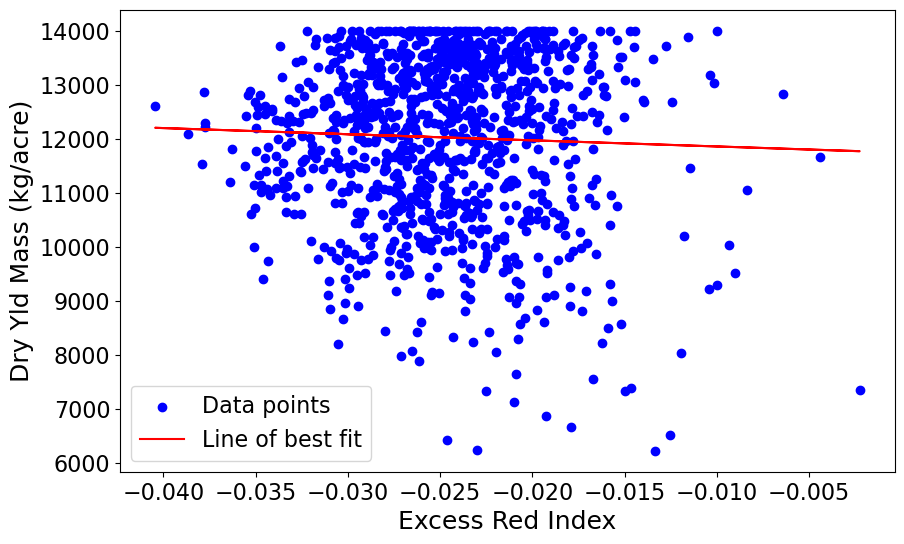

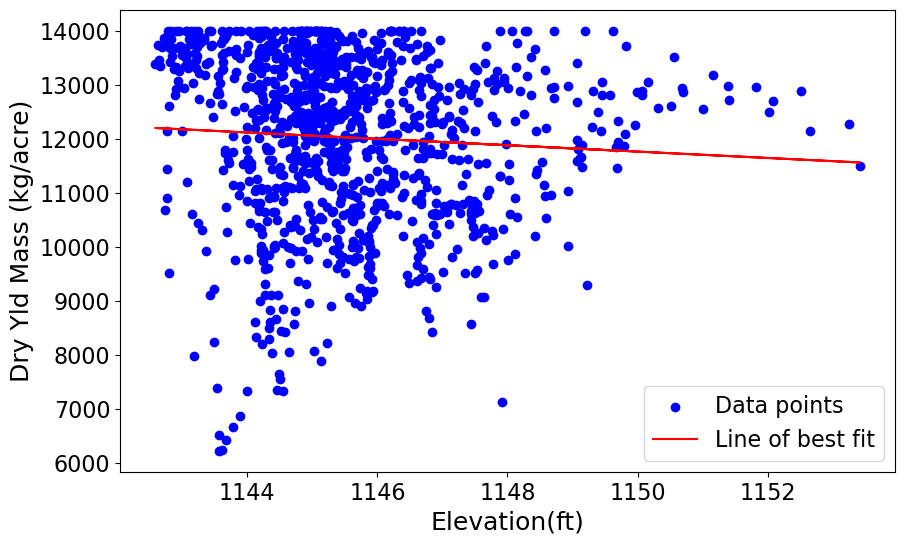

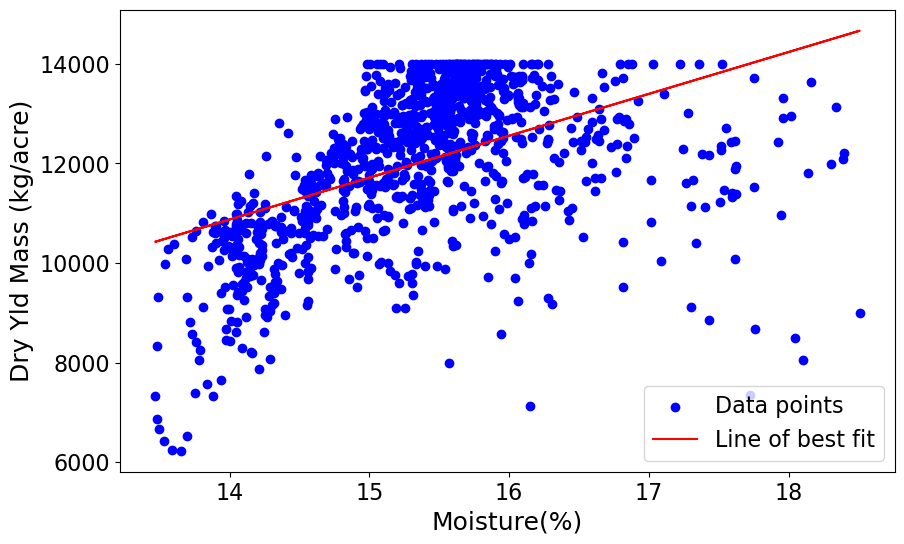

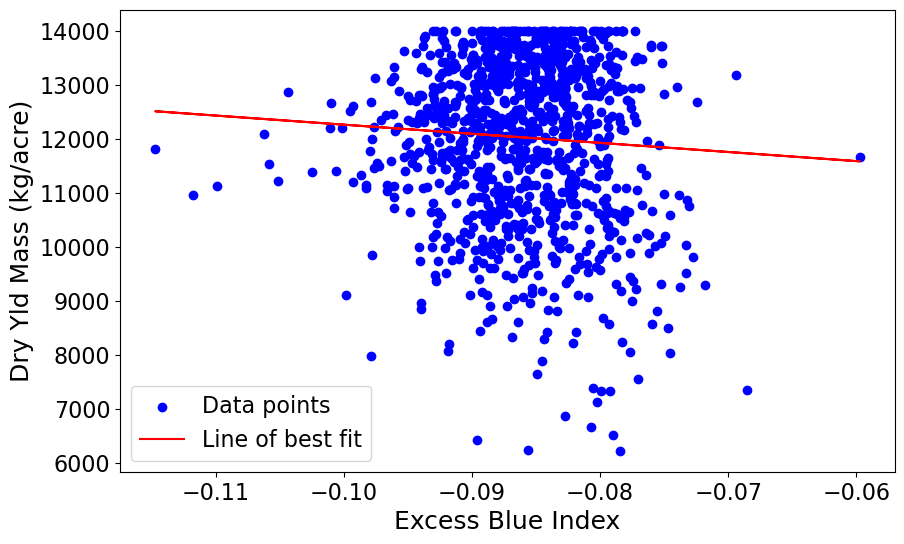

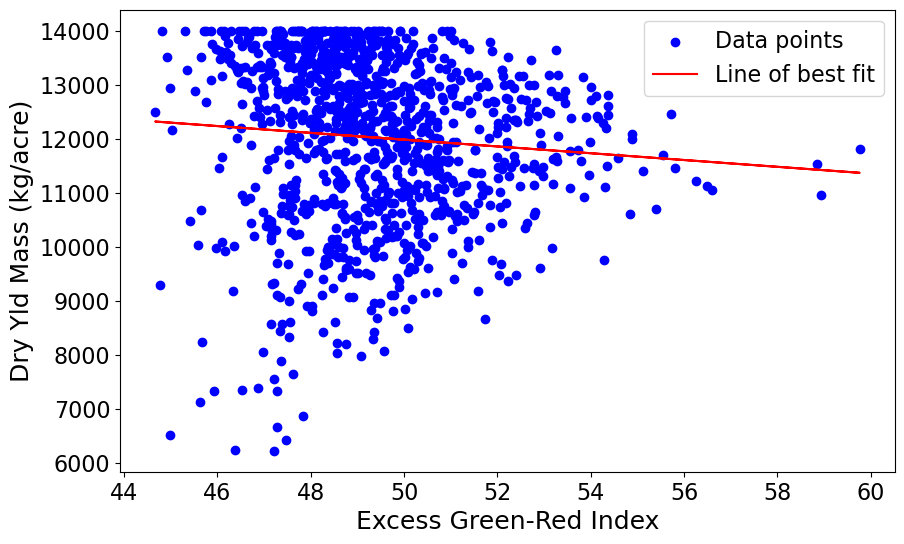

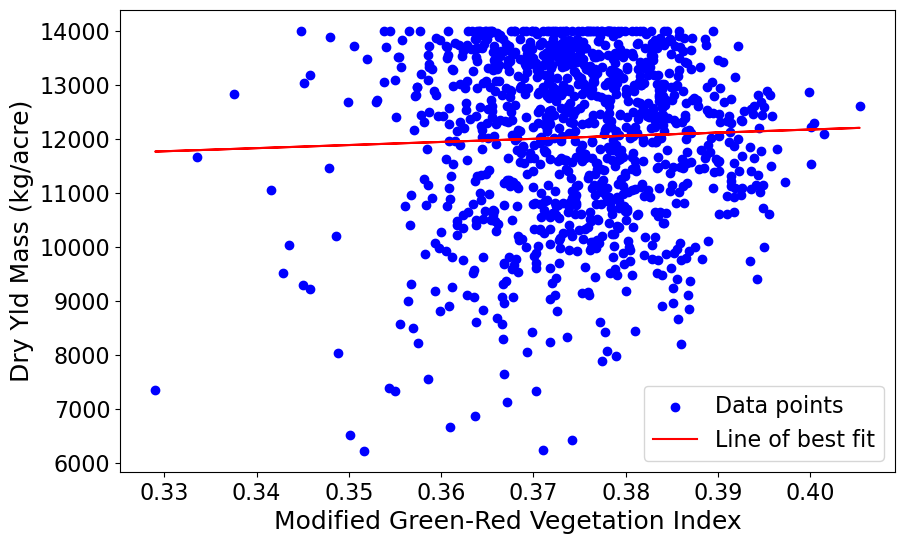

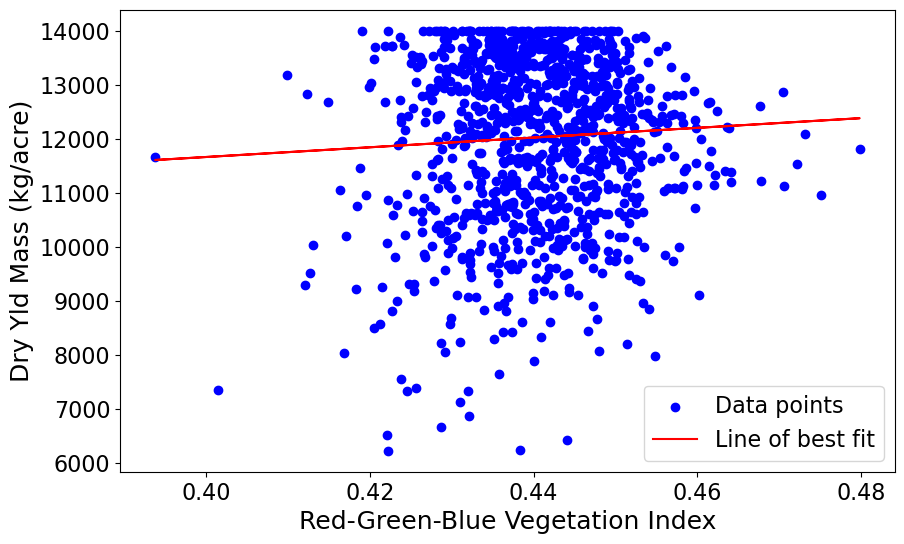

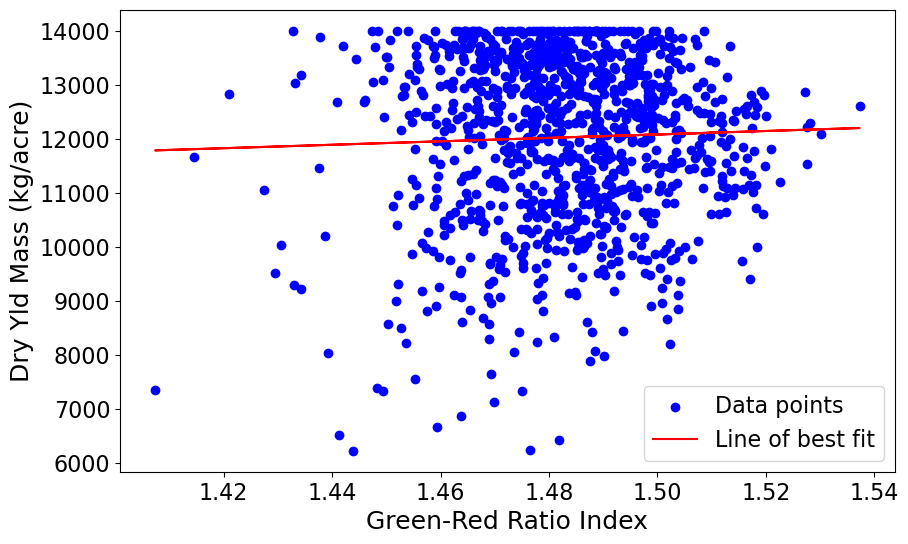

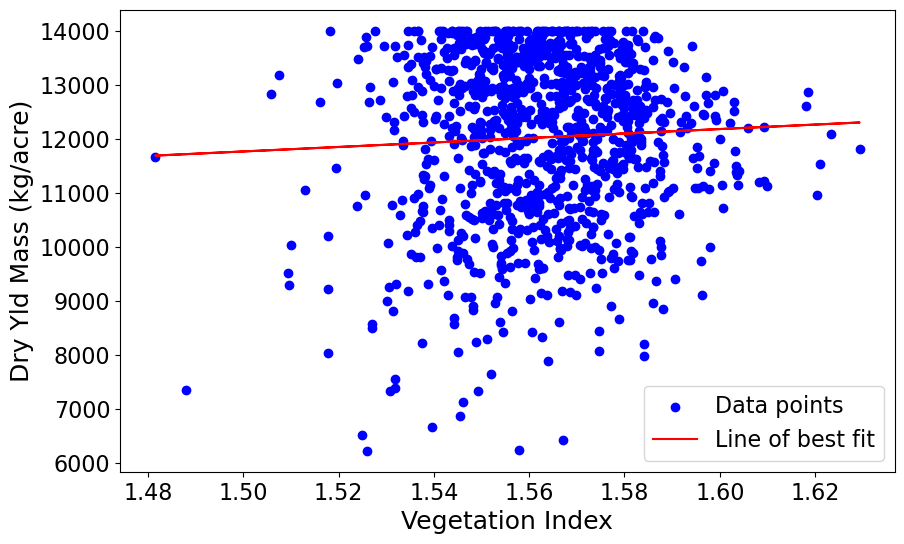

In [23]:
independent_vars = ['Red', 'Green', 'Blue', 'BI', 'GLI', 'NGRDI', 'VARI', 'BGI',
                    'ExG', 'ExR', 'Elevation(', 'Moisture(%', 'ExB', 'ExGR', 'MGRVI', 'RGBVI', 'GRRI', 'VEG']

dependent_var = 'Yld Mass(D'

intitle_vars = ['Red', 'Green', 'Blue', 'Brightness Index', 'Green Leaf Index', 'Normalized Green-Red Index', 'Visible Atmospheric Resistant Index', 'Blue-Green Index',
                'Excess Green Index', 'Excess Red Index', 'Elevation(ft)', 'Moisture(%)', 'Excess Blue Index', 'Excess Green-Red Index', 'Modified Green-Red Vegetation Index',
                'Red-Green-Blue Vegetation Index', 'Green-Red Ratio Index', 'Vegetation Index']

for var, title in zip(independent_vars, intitle_vars):
    plot_correlation_graphs_7_21_2021(pf, var, dependent_var, title)

In [28]:
#import data
pf = pd.read_csv('July_12_2021.csv') 
pf.head()

Plot  Year     Date     Red   Green    Blue         BI       GLI     NGRDI  \
0    10  2021  7122021  43.381  65.580  37.487  50.292222  0.237195  0.203733   
1   100  2021  7122021  47.079  68.731  40.102  53.380874  0.223826  0.186961   
2  1000  2021  7122021  44.014  64.905  37.321  50.142292  0.229582  0.191803   
3  1001  2021  7122021  43.385  63.678  36.391  49.198411  0.229709  0.189543   
4  1002  2021  7122021  43.522  64.188  36.985  49.605625  0.229167  0.191867   

       VARI  ...      right     bottom  Crop Flw(M   Crop Flw(V   Elevation(  \
0  0.310588  ... -93.531087  44.077643   22.856643  1469.352308  1149.698459   
1  0.285994  ... -93.530970  44.077877   24.395856  1568.304403  1148.932088   
2  0.291782  ... -93.529878  44.077721   17.781074  1143.067837  1146.668877   
3  0.287143  ... -93.529878  44.077682   21.049884  1353.204549  1146.556017   
4  0.292202  ... -93.529878  44.077643   18.681682  1200.964064  1146.621894   

   Moisture(%    Yld Mass(D  Yld Vol(Dr          X          Y  
0   14.982888  11941.481228  213.240485 -93.531098  44.077669  
1   15.534577  12985.621257  231.885824 -93.530981  44.077903  
2   15.872769  10789.630425  192.671722 -93.529889  44.077747  
3   15.901756  12275.215386  219.199995 -93.529889  44.077708  
4   15.948643  11643.570638  207.920634 -93.529889  44.077669  

[5 rows x 34 columns]

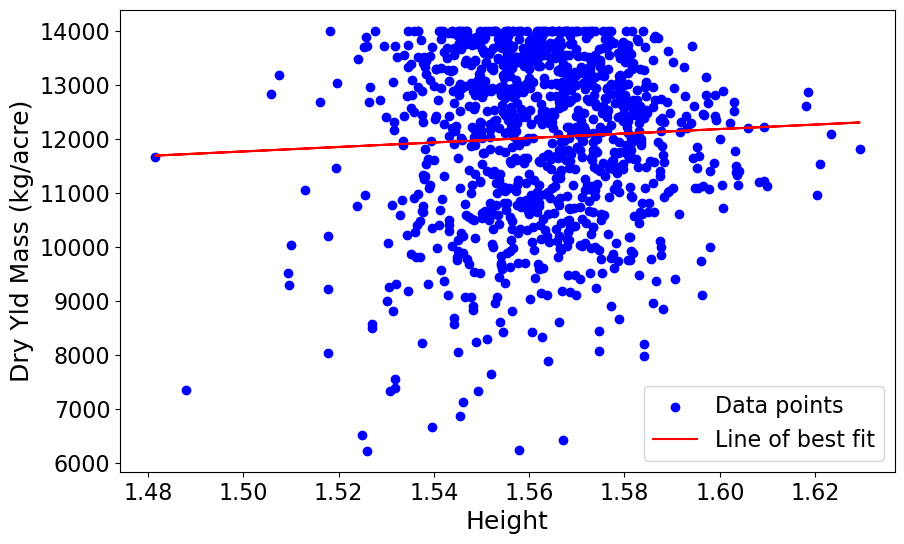

In [29]:
independent_vars = ['Red', 'Green', 'Blue', 'BI', 'GLI', 'NGRDI', 'VARI', 'BGI',
                    'ExG', 'ExR', 'Elevation(', 'Moisture(%', 'ExB', 'ExGR', 'MGRVI', 'RGBVI', 'GRRI', 'VEG']

dependent_var = 'Yld Mass(D'

indep = 'Height'
title = 'Height'

# intitle_vars = ['Red', 'Green', 'Blue', 'Brightness Index', 'Green Leaf Index', 'Normalized Green-Red Index', 'Visible Atmospheric Resistant Index', 'Blue-Green Index',
#                 'Excess Green Index', 'Excess Red Index', 'Elevation(ft)', 'Moisture(%)', 'Excess Blue Index', 'Excess Green-Red Index', 'Modified Green-Red Vegetation Index',
#                 'Red-Green-Blue Vegetation Index', 'Green-Red Ratio Index', 'Vegetation Index']

# for var, title in zip(independent_vars, intitle_vars):
plot_correlation_graphs_7_21_2021(pf, var, dependent_var, title)

In [30]:
#import data
pf = pd.read_csv('June_16_2021.csv') 
pf.head()

Plot  Year     Date     Red   Green    Blue         BI       GLI     NGRDI  \
0    10  2021  6162021  85.640  112.20  74.896  92.254106  0.165908  0.134250   
1   100  2021  6162021  92.877  118.41  79.038  98.139477  0.158795  0.120845   
2  1000  2021  6162021  76.151  102.45  68.711  83.698225  0.171654  0.147250   
3  1001  2021  6162021  77.916  103.76  69.135  84.885587  0.170541  0.142253   
4  1002  2021  6162021  75.018   99.91  66.835  81.805920  0.169656  0.142299   

       VARI  ...      right     bottom  Crop Flw(M   Crop Flw(V   Elevation(  \
0  0.216033  ... -93.531087  44.077643   22.856643  1469.352308  1149.698459   
1  0.193068  ... -93.530970  44.077877   24.395856  1568.304403  1148.932088   
2  0.239321  ... -93.529878  44.077721   17.781074  1143.067837  1146.668877   
3  0.229641  ... -93.529878  44.077682   21.049884  1353.204549  1146.556017   
4  0.230283  ... -93.529878  44.077643   18.681682  1200.964064  1146.621894   

   Moisture(%    Yld Mass(D  Yld Vol(Dr          X          Y  
0   14.982888  11941.481228  213.240485 -93.531098  44.077669  
1   15.534577  12985.621257  231.885824 -93.530981  44.077903  
2   15.872769  10789.630425  192.671722 -93.529889  44.077747  
3   15.901756  12275.215386  219.199995 -93.529889  44.077708  
4   15.948643  11643.570638  207.920634 -93.529889  44.077669  

[5 rows x 34 columns]

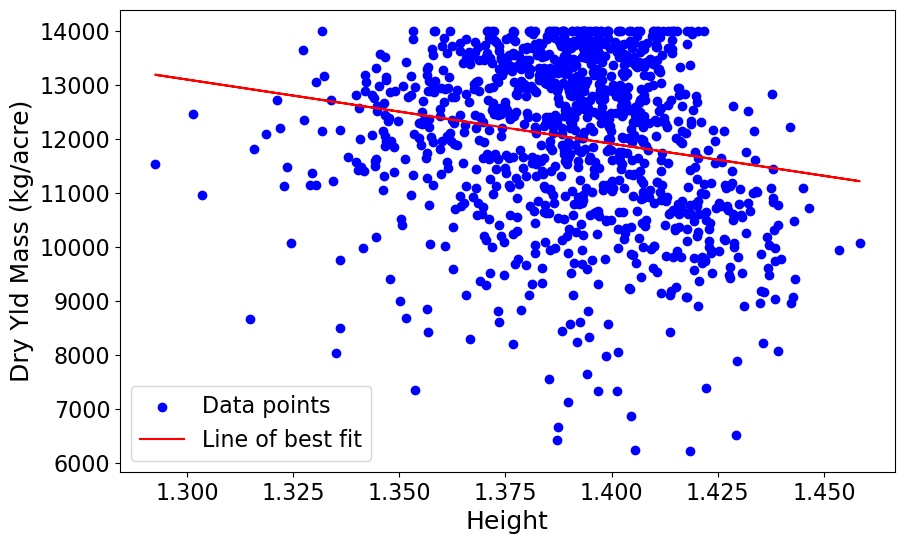

In [31]:
independent_vars = ['Red', 'Green', 'Blue', 'BI', 'GLI', 'NGRDI', 'VARI', 'BGI',
                    'ExG', 'ExR', 'Elevation(', 'Moisture(%', 'ExB', 'ExGR', 'MGRVI', 'RGBVI', 'GRRI', 'VEG']

dependent_var = 'Yld Mass(D'

indep = 'Height'
title = 'Height'

# intitle_vars = ['Red', 'Green', 'Blue', 'Brightness Index', 'Green Leaf Index', 'Normalized Green-Red Index', 'Visible Atmospheric Resistant Index', 'Blue-Green Index',
#                 'Excess Green Index', 'Excess Red Index', 'Elevation(ft)', 'Moisture(%)', 'Excess Blue Index', 'Excess Green-Red Index', 'Modified Green-Red Vegetation Index',
#                 'Red-Green-Blue Vegetation Index', 'Green-Red Ratio Index', 'Vegetation Index']

# for var, title in zip(independent_vars, intitle_vars):
plot_correlation_graphs_6_16_2021(pf, var, dependent_var, title)

In [32]:
#import data
pf = pd.read_csv('June_22_2021.csv') 
pf.head()

Plot  Year     Date     Red    Green    Blue          BI       GLI  \
0    10  2021  6222021  83.276  114.810  74.026   92.368965  0.186906   
1   100  2021  6222021  95.555  126.110  83.621  103.323056  0.169320   
2  1000  2021  6222021  69.260  100.340  62.231   79.031134  0.208293   
3  1001  2021  6222021  69.937  101.480  62.498   79.781732  0.210274   
4  1002  2021  6222021  67.815   99.029  60.808   77.681465  0.212547   

      NGRDI      VARI  ...      right     bottom  Crop Flw(M   Crop Flw(V  \
0  0.159193  0.254183  ... -93.531087  44.077643   22.856643  1469.352308   
1  0.137843  0.221342  ... -93.530970  44.077877   24.395856  1568.304403   
2  0.183255  0.289469  ... -93.529878  44.077721   17.781074  1143.067837   
3  0.184013  0.289601  ... -93.529878  44.077682   21.049884  1353.204549   
4  0.187085  0.294372  ... -93.529878  44.077643   18.681682  1200.964064   

    Elevation(  Moisture(%    Yld Mass(D  Yld Vol(Dr          X          Y  
0  1149.698459   14.982888  11941.481228  213.240485 -93.531098  44.077669  
1  1148.932088   15.534577  12985.621257  231.885824 -93.530981  44.077903  
2  1146.668877   15.872769  10789.630425  192.671722 -93.529889  44.077747  
3  1146.556017   15.901756  12275.215386  219.199995 -93.529889  44.077708  
4  1146.621894   15.948643  11643.570638  207.920634 -93.529889  44.077669  

[5 rows x 34 columns]

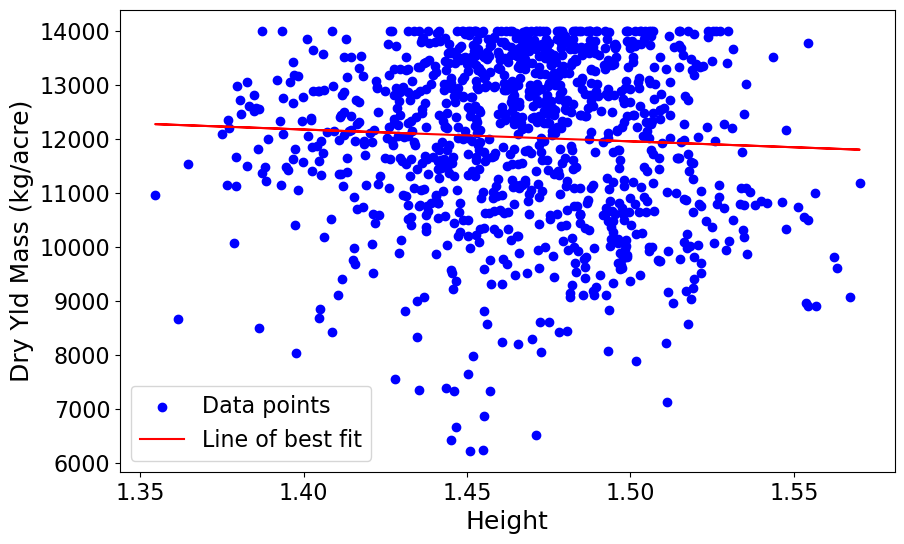

In [33]:
independent_vars = ['Red', 'Green', 'Blue', 'BI', 'GLI', 'NGRDI', 'VARI', 'BGI',
                    'ExG', 'ExR', 'Elevation(', 'Moisture(%', 'ExB', 'ExGR', 'MGRVI', 'RGBVI', 'GRRI', 'VEG']

dependent_var = 'Yld Mass(D'

indep = 'Height'
title = 'Height'

# intitle_vars = ['Red', 'Green', 'Blue', 'Brightness Index', 'Green Leaf Index', 'Normalized Green-Red Index', 'Visible Atmospheric Resistant Index', 'Blue-Green Index',
#                 'Excess Green Index', 'Excess Red Index', 'Elevation(ft)', 'Moisture(%)', 'Excess Blue Index', 'Excess Green-Red Index', 'Modified Green-Red Vegetation Index',
#                 'Red-Green-Blue Vegetation Index', 'Green-Red Ratio Index', 'Vegetation Index']

# for var, title in zip(independent_vars, intitle_vars):
plot_correlation_graphs_6_22_2021(pf, var, dependent_var, title)

In [34]:
#import data
pf = pd.read_csv('June_22_2021.csv') 
pf.head()

Plot  Year     Date     Red    Green    Blue          BI       GLI  \
0    10  2021  6222021  83.276  114.810  74.026   92.368965  0.186906   
1   100  2021  6222021  95.555  126.110  83.621  103.323056  0.169320   
2  1000  2021  6222021  69.260  100.340  62.231   79.031134  0.208293   
3  1001  2021  6222021  69.937  101.480  62.498   79.781732  0.210274   
4  1002  2021  6222021  67.815   99.029  60.808   77.681465  0.212547   

      NGRDI      VARI  ...      right     bottom  Crop Flw(M   Crop Flw(V  \
0  0.159193  0.254183  ... -93.531087  44.077643   22.856643  1469.352308   
1  0.137843  0.221342  ... -93.530970  44.077877   24.395856  1568.304403   
2  0.183255  0.289469  ... -93.529878  44.077721   17.781074  1143.067837   
3  0.184013  0.289601  ... -93.529878  44.077682   21.049884  1353.204549   
4  0.187085  0.294372  ... -93.529878  44.077643   18.681682  1200.964064   

    Elevation(  Moisture(%    Yld Mass(D  Yld Vol(Dr          X          Y  
0  1149.698459   14.982888  11941.481228  213.240485 -93.531098  44.077669  
1  1148.932088   15.534577  12985.621257  231.885824 -93.530981  44.077903  
2  1146.668877   15.872769  10789.630425  192.671722 -93.529889  44.077747  
3  1146.556017   15.901756  12275.215386  219.199995 -93.529889  44.077708  
4  1146.621894   15.948643  11643.570638  207.920634 -93.529889  44.077669  

[5 rows x 34 columns]

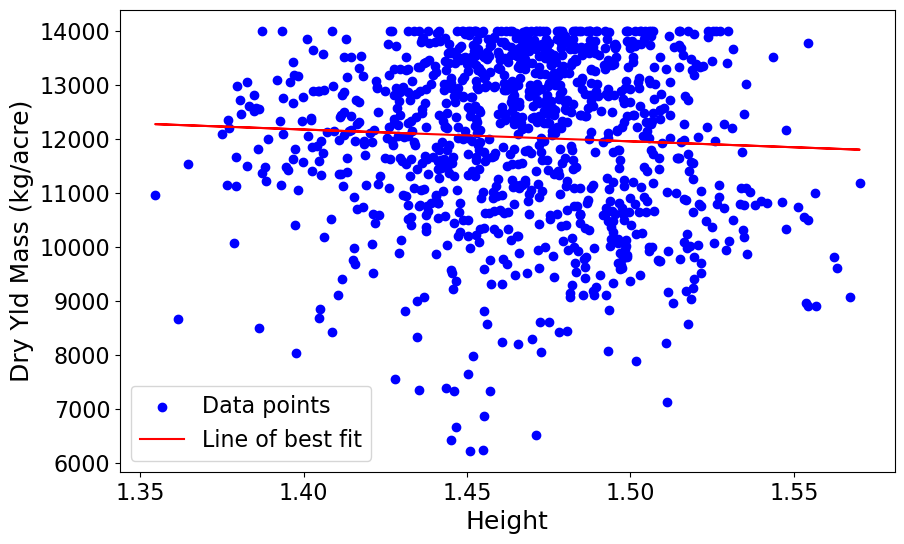

In [35]:
independent_vars = ['Red', 'Green', 'Blue', 'BI', 'GLI', 'NGRDI', 'VARI', 'BGI',
                    'ExG', 'ExR', 'Elevation(', 'Moisture(%', 'ExB', 'ExGR', 'MGRVI', 'RGBVI', 'GRRI', 'VEG']

dependent_var = 'Yld Mass(D'

indep = 'Height'
title = 'Height'

# intitle_vars = ['Red', 'Green', 'Blue', 'Brightness Index', 'Green Leaf Index', 'Normalized Green-Red Index', 'Visible Atmospheric Resistant Index', 'Blue-Green Index',
#                 'Excess Green Index', 'Excess Red Index', 'Elevation(ft)', 'Moisture(%)', 'Excess Blue Index', 'Excess Green-Red Index', 'Modified Green-Red Vegetation Index',
#                 'Red-Green-Blue Vegetation Index', 'Green-Red Ratio Index', 'Vegetation Index']

# for var, title in zip(independent_vars, intitle_vars):
plot_correlation_graphs_6_22_2021(pf, var, dependent_var, title)

In [36]:
#import data
pf = pd.read_csv('June_30_2021.csv') 
pf.head()

Plot  Year     Date     Red    Green    Blue         BI       GLI  \
0    10  2021  6302021  74.218  108.390  67.860  85.365261  0.208166   
1   100  2021  6302021  78.800  113.700  72.672  90.218900  0.200405   
2  1000  2021  6302021  52.207   79.147  45.413  60.696400  0.237087   
3  1001  2021  6302021  52.388   79.119  45.926  60.864648  0.233574   
4  1002  2021  6302021  52.336   78.947  45.684  60.714396  0.233961   

      NGRDI      VARI  ...      right     bottom  Crop Flw(M   Crop Flw(V  \
0  0.187133  0.297800  ... -93.531087  44.077643   22.856643  1469.352308   
1  0.181299  0.291251  ... -93.530970  44.077877   24.395856  1568.304403   
2  0.205095  0.313471  ... -93.529878  44.077721   17.781074  1143.067837   
3  0.203267  0.312347  ... -93.529878  44.077682   21.049884  1353.204549   
4  0.202700  0.310880  ... -93.529878  44.077643   18.681682  1200.964064   

    Elevation(  Moisture(%    Yld Mass(D  Yld Vol(Dr          X          Y  
0  1149.698459   14.982888  11941.481228  213.240485 -93.531098  44.077669  
1  1148.932088   15.534577  12985.621257  231.885824 -93.530981  44.077903  
2  1146.668877   15.872769  10789.630425  192.671722 -93.529889  44.077747  
3  1146.556017   15.901756  12275.215386  219.199995 -93.529889  44.077708  
4  1146.621894   15.948643  11643.570638  207.920634 -93.529889  44.077669  

[5 rows x 34 columns]

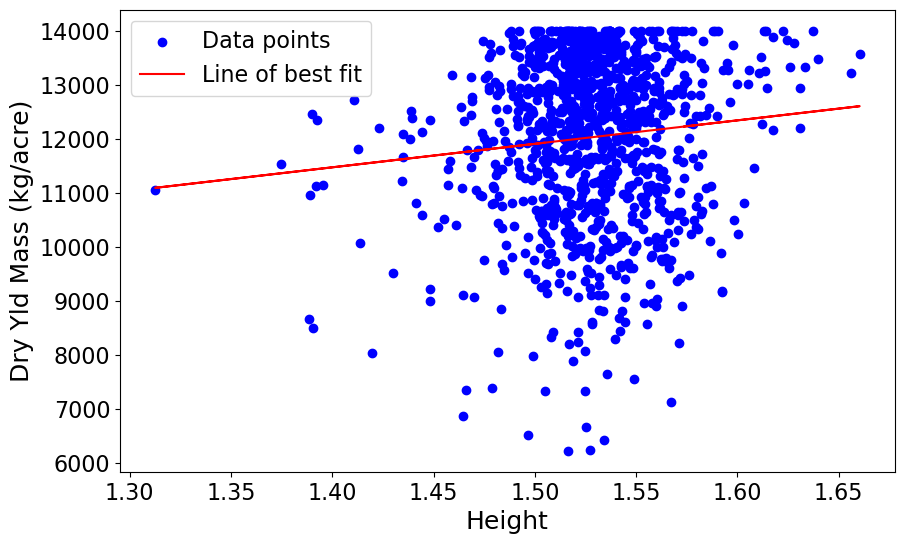

In [38]:
independent_vars = ['Red', 'Green', 'Blue', 'BI', 'GLI', 'NGRDI', 'VARI', 'BGI',
                    'ExG', 'ExR', 'Elevation(', 'Moisture(%', 'ExB', 'ExGR', 'MGRVI', 'RGBVI', 'GRRI', 'VEG']

dependent_var = 'Yld Mass(D'

indep = 'Height'
title = 'Height'

# intitle_vars = ['Red', 'Green', 'Blue', 'Brightness Index', 'Green Leaf Index', 'Normalized Green-Red Index', 'Visible Atmospheric Resistant Index', 'Blue-Green Index',
#                 'Excess Green Index', 'Excess Red Index', 'Elevation(ft)', 'Moisture(%)', 'Excess Blue Index', 'Excess Green-Red Index', 'Modified Green-Red Vegetation Index',
#                 'Red-Green-Blue Vegetation Index', 'Green-Red Ratio Index', 'Vegetation Index']

# for var, title in zip(independent_vars, intitle_vars):
plot_correlation_graphs_6_30_2021(pf, var, dependent_var, title)